# Universidad Nacional de Colombia sede Medellín
# Optimización con Redes Neuronales
### Davinson Montoya Ramirez 71277483
### Jessica María Rivera Jiménez 1017205993
### Luis Felipe Arévalo Cortés 1018469500

# 1. Reproducción del Tutorial

Se instala la librería de TensorFlow para utilizar el modelo de redes neuronales, y el conjunto de datos  MNIST.

In [5]:
# Installa TensorFlow

import tensorflow as tf
import random as rndm
import numpy as np
import pandas as pd

Se escalan los datos y se dividen en el conjunto de entrenamiento y prueba

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


Se define el modelo de red neuronal de 3 capas, con la función de activación Relu para la capa oculta, y la función de activación softmax para la capa de salida. También se define el optimizador inicialmente se selecciona adam, y la función de pérdida se escoge la sparse_categorical_cross_entropy, por último se escoge la métrica de compilación accuracy.

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Se entrena el modelo con el conjunto de datos x_train y y_train en 5 épocas, y se muestran los resultados

In [4]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1432 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0893 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0748 - accuracy: 0.9767
313/313 - 0s - loss: 0.0755 - accuracy: 0.9769


[0.07552359253168106, 0.9768999814987183]

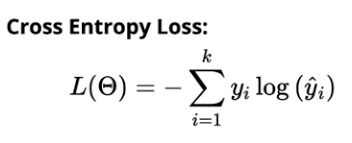

Donde yi es el valor real y ybi el valor predicho

La fórmula matemática para la función de pérdida entre categorical cross entropy y sparse categorical cross entropy es la misma. Para este problema, se usó sparse categorical cross entropy porque el formato del conjunto de datos son mutuamente excluyentes, es decir, cuando cada etiqueta pertenece sólo a una clase.

# 2. Cambiando los Métodos de Optimización (SGD, RSMprop, Adagrad y Adadelta)

Para cada uno de los optimizadores mencionados, se definió un modelo que contiene el ajuste, la presentación de las gráficas de función de pérdida, gráficas de accuracy, predicciones y evaluación del modelo correspondiente.

## SGD



Se cambia el método de optimización por el descenso de gradiente estocástico. El algoritmo de descenso de gradiente estocástico lee un fragmento de datos e inmediatamente calcula el gradiente de la función de costo para actualizar los parámetros. Como ventaja tiene la posibilidad de saltar de un óptimo local relativamente pobre y converger hacia un óptimo local mejor o incluso un óptimo global. Su desventaja es que puede converger rápidamente a un óptimo local y quedar atrapado ahí.


In [7]:
#https://www.tensorflow.org/guide/keras/train_and_evaluate

def modelOptimizadorSGDTasaAprendizaje(n):
  # Aquí se compila el modelo diciendo cuál es el optimizador,
  # la función de costo y la métrica que se debe evaluar:
  print("SGD : "+str(n))
  model.compile(optimizer=keras.optimizers.SGD(learning_rate=n),
              loss=loss_fn,
              metrics=['accuracy'])
  # Aquí se entrena el modelo. Cada muestra del conjunto de entrenamiento pueda ser usada máximo cinco veces:
  history = model.fit(x_train, y_train, epochs=5)
  # Veamos la gráfica que ilustra cómo transcurrió el proceso de optimización:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Loss vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.plot(history.history['loss'])
  plt.subplot(1,2,2)
  plt.title("Accuracy vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.plot(history.history['accuracy'])
  plt.show()
  # Matriz de confusión de los datos de entrenamiento con el modelo entrenado:
  y_test_pred_conentrenamiento_logit = model(x_train).numpy() # Predicciones en la escala logit
  y_test_pred_conentrenamiento = np.argmax(y_test_pred_conentrenamiento_logit,axis=1) # Predicciones de los datos. 
  # Matriz de confusión de los datos de entrenamiento con el modelo entrenado:
  df_confusion_conaprendizaje = pd.crosstab(y_train, y_test_pred_conentrenamiento)
  print('Matriz de confusión luego del aprendizaje:') # Las filas son los valores verdaderos
  print(df_confusion_conaprendizaje)
  # Aquí se evalúa el modelo en el conjunto de validación:
  model.evaluate(x_test,  y_test, verbose=2)
  # Aquí se crea el un nuevo modelo cuya salida es probabilística (entre 0 y 1). Para ello se combina el modelo
  # anterior con un layer softmax al final
  probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
  ])
  # Predicciones para las dos primeras observaciones del conjunto de prueba
  print(probability_model(x_test[0:2]))
  # Valores de prueba predichos: 
  prediccion_y_test_prob = probability_model(x_test).numpy()
  print(prediccion_y_test_prob)
  # ¿Cuál es la forma de las predicciones?
  print(prediccion_y_test_prob.shape)
  y_test_max_val = np.argmax(prediccion_y_test_prob,axis=1)
  print(y_test_max_val.size)
  plt.title("Predichos vs Observados (con jitter)")
  plt.xlabel('Real')
  plt.ylabel('Predicho')
  plt.grid(True)
  plt.plot(y_test+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         y_test_max_val+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         'bo')
  #plt.legend(loc=0)
  plt.show()
  df_confusion = pd.crosstab(y_test, y_test_max_val)
  print('Matriz de confusión:')
  print(df_confusion)
  accuracy_val = sum(np.diag(df_confusion))/len(y_test)
  print('Accuracy = ', accuracy_val)
  print('******************************************************************************************')
  print('\n')
  print('\n')

## RSMprop

Es un método de tasa de aprendizaje adaptativo. RSMprop calcula el promedio de todos los cuadrados del gradiente, entre los beneficios puede aliviar el problema de la rápida disminución en la tasa de aprendizaje del algoritmo de Adagrad.

In [8]:
#https://www.tensorflow.org/guide/keras/train_and_evaluate

def modelOptimizadorRSMpropTasaAprendizaje(n):
  # Aquí se compila el modelo diciendo cuál es el optimizador,
  # la función de costo y la métrica que se debe evaluar:
  print("RSMprop : "+str(n))
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=n),
              loss=loss_fn,
              metrics=['accuracy'])
  # Aquí se entrena el modelo. Cada muestra del conjunto de entrenamiento pueda ser usada máximo cinco veces:
  history = model.fit(x_train, y_train, epochs=5)
  # Veamos la gráfica que ilustra cómo transcurrió el proceso de optimización:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Loss vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.plot(history.history['loss'])
  plt.subplot(1,2,2)
  plt.title("Accuracy vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.plot(history.history['accuracy'])
  plt.show()
  # Matriz de confusión de los datos de entrenamiento con el modelo entrenado:
  y_test_pred_conentrenamiento_logit = model(x_train).numpy() # Predicciones en la escala logit
  y_test_pred_conentrenamiento = np.argmax(y_test_pred_conentrenamiento_logit,axis=1) # Predicciones de los datos. 
  # Matriz de confusión de los datos de entrenamiento con el modelo entrenado:
  df_confusion_conaprendizaje = pd.crosstab(y_train, y_test_pred_conentrenamiento)
  print('Matriz de confusión luego del aprendizaje:') # Las filas son los valores verdaderos
  print(df_confusion_conaprendizaje)
  # Aquí se evalúa el modelo en el conjunto de validación:
  model.evaluate(x_test,  y_test, verbose=2)
  # Aquí se crea el un nuevo modelo cuya salida es probabilística (entre 0 y 1). Para ello se combina el modelo
  # anterior con un layer softmax al final
  probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
  ])
  # Predicciones para las dos primeras observaciones del conjunto de prueba
  print(probability_model(x_test[0:2]))
  # Valores de prueba predichos: 
  prediccion_y_test_prob = probability_model(x_test).numpy()
  print(prediccion_y_test_prob)
  # ¿Cuál es la forma de las predicciones?
  print(prediccion_y_test_prob.shape)
  y_test_max_val = np.argmax(prediccion_y_test_prob,axis=1)
  print(y_test_max_val.size)
  plt.title("Predichos vs Observados (con jitter)")
  plt.xlabel('Real')
  plt.ylabel('Predicho')
  plt.grid(True)
  plt.plot(y_test+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         y_test_max_val+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         'bo')
  #plt.legend(loc=0)
  plt.show()
  df_confusion = pd.crosstab(y_test, y_test_max_val)
  print('Matriz de confusión:')
  print(df_confusion)
  accuracy_val = sum(np.diag(df_confusion))/len(y_test)
  print('Accuracy = ', accuracy_val)
  print('******************************************************************************************')
  print('\n')
  print('\n')

## Adagrad

Se define como una modificación del optimizador Stochastic Gradient Descent donde se utilizan diferentes tasas de aprendizaje para las variables. Se tiene en cuenta el gradiente acumulado en cada una de ellas. Un problema de este optimizador es que es probable que la tasa de aprendizaje para una variable decrezca demasiado rápido debido a la acumulación de altos valores del gradiente al comienzo del entrenamiento, esto conlleva a que el modelo no sea capaz de aproximarse al mínimo en dicha dimensión.

In [ ]:
def modelOptimizadorAdagramTasaAprendizaje(n):
  # Aquí se compila el modelo diciendo cuál es el optimizador,
  # la función de costo y la métrica que se debe evaluar:
  print("Adagrad : "+str(n))
  model.compile(optimizer=keras.optimizers.Adagrad(learning_rate=n),
              loss=loss_fn,
              metrics=['accuracy'])
  # Aquí se entrena el modelo. Cada muestra del conjunto de entrenamiento pueda ser usada máximo cinco veces:
  history = model.fit(x_train, y_train, epochs=5)
  # Veamos la gráfica que ilustra cómo transcurrió el proceso de optimización:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Loss vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.plot(history.history['loss'])
  plt.subplot(1,2,2)
  plt.title("Accuracy vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.plot(history.history['accuracy'])
  plt.show()
  # Matriz de confusión de los datos de entrenamiento con el modelo entrenado:
  y_test_pred_conentrenamiento_logit = model(x_train).numpy() # Predicciones en la escala logit
  y_test_pred_conentrenamiento = np.argmax(y_test_pred_conentrenamiento_logit,axis=1) # Predicciones de los datos. 
  # Matriz de confusión de los datos de entrenamiento con el modelo entrenado:
  df_confusion_conaprendizaje = pd.crosstab(y_train, y_test_pred_conentrenamiento)
  print('Matriz de confusión luego del aprendizaje:') # Las filas son los valores verdaderos
  print(df_confusion_conaprendizaje)
  # Aquí se evalúa el modelo en el conjunto de validación:
  model.evaluate(x_test,  y_test, verbose=2)
  # Aquí se crea el un nuevo modelo cuya salida es probabilística (entre 0 y 1). Para ello se combina el modelo
  # anterior con un layer softmax al final
  probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
  ])
  # Predicciones para las dos primeras observaciones del conjunto de prueba
  print(probability_model(x_test[0:2]))
  # Valores de prueba predichos: 
  prediccion_y_test_prob = probability_model(x_test).numpy()
  print(prediccion_y_test_prob)
  # ¿Cuál es la forma de las predicciones?
  print(prediccion_y_test_prob.shape)
  y_test_max_val = np.argmax(prediccion_y_test_prob,axis=1)
  print(y_test_max_val.size)
  plt.title("Predichos vs Observados (con jitter)")
  plt.xlabel('Real')
  plt.ylabel('Predicho')
  plt.grid(True)
  plt.plot(y_test+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         y_test_max_val+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         'bo')
  #plt.legend(loc=0)
  plt.show()
  df_confusion = pd.crosstab(y_test, y_test_max_val)
  print('Matriz de confusión:')
  print(df_confusion)
  accuracy_val = sum(np.diag(df_confusion))/len(y_test)
  print('Accuracy = ', accuracy_val)
  print('******************************************************************************************')
  print('\n')
  print('\n')

## Adadelta

Es una extensión más robusta de Adagrad, que adapta sus curvas de aprendizaje basado en una ventana móvil de actualizaciones del gradiente. En lugar de acumular todos los gradientes del pasado. De esta forma Adadelta continúa aprendiendo incluso cuando muchas actualizaciones han sido finalizadas.

In [ ]:
def modelOptimizadorAdadeltaTasaAprendizaje(n):
  # Aquí se compila el modelo diciendo cuál es el optimizador,
  # la función de costo y la métrica que se debe evaluar:
  print("Adadelta : "+str(n))
  model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=n),
              loss=loss_fn,
              metrics=['accuracy'])
  # Aquí se entrena el modelo. Cada muestra del conjunto de entrenamiento pueda ser usada máximo cinco veces:
  history = model.fit(x_train, y_train, epochs=5)
  # Veamos la gráfica que ilustra cómo transcurrió el proceso de optimización:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Loss vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.plot(history.history['loss'])
  plt.subplot(1,2,2)
  plt.title("Accuracy vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.plot(history.history['accuracy'])
  plt.show()
  # Matriz de confusión de los datos de entrenamiento con el modelo entrenado:
  y_test_pred_conentrenamiento_logit = model(x_train).numpy() # Predicciones en la escala logit
  y_test_pred_conentrenamiento = np.argmax(y_test_pred_conentrenamiento_logit,axis=1) # Predicciones de los datos. 
  # Matriz de confusión de los datos de entrenamiento con el modelo entrenado:
  df_confusion_conaprendizaje = pd.crosstab(y_train, y_test_pred_conentrenamiento)
  print('Matriz de confusión luego del aprendizaje:') # Las filas son los valores verdaderos
  print(df_confusion_conaprendizaje)
  # Aquí se evalúa el modelo en el conjunto de validación:
  model.evaluate(x_test,  y_test, verbose=2)
  # Aquí se crea el un nuevo modelo cuya salida es probabilística (entre 0 y 1). Para ello se combina el modelo
  # anterior con un layer softmax al final
  probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
  ])
  # Predicciones para las dos primeras observaciones del conjunto de prueba
  print(probability_model(x_test[0:2]))
  # Valores de prueba predichos: 
  prediccion_y_test_prob = probability_model(x_test).numpy()
  print(prediccion_y_test_prob)
  # ¿Cuál es la forma de las predicciones?
  print(prediccion_y_test_prob.shape)
  y_test_max_val = np.argmax(prediccion_y_test_prob,axis=1)
  print(y_test_max_val.size)
  plt.title("Predichos vs Observados (con jitter)")
  plt.xlabel('Real')
  plt.ylabel('Predicho')
  plt.grid(True)
  plt.plot(y_test+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         y_test_max_val+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         'bo')
  #plt.legend(loc=0)
  plt.show()
  df_confusion = pd.crosstab(y_test, y_test_max_val)
  print('Matriz de confusión:')
  print(df_confusion)
  accuracy_val = sum(np.diag(df_confusion))/len(y_test)
  print('Accuracy = ', accuracy_val)
  print('******************************************************************************************')
  print('\n')
  print('\n')

## Variando la Tasa de Aprendizaje

Se definen varias tasas de aprendizaje y se almacenan como una lista en la variable n. Estas tasas pasan por cada optmizador previamente definido y se muestran los resultados.

SGD : 0.001
Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 1.6658 - accuracy: 0.3400
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 1.6644 - accuracy: 0.3400
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 1.6883 - accuracy: 0.3300
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 1.5917 - accuracy: 0.3700
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 1.6501 - accuracy: 0.3467


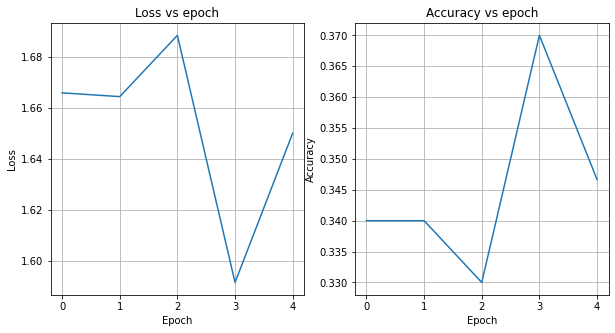

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   3   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.7826 - accuracy: 0.4065
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.08177316 0.0405202  0.10164419 0.13612759 0.13147314 0.09489327
  0.08207317 0.06335933 0.13475533 0.13338062]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.08177316 0.0405202  0.10164419 ... 0.06335933 0.13475533 0.13338062]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.08177316 0.0405202  0

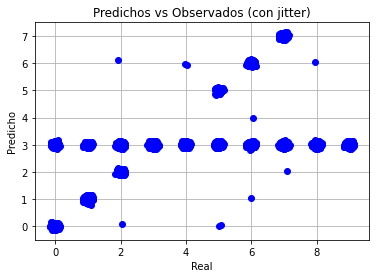

Matriz de confusión:
col_0    0    1    2     3  4    5    6    7
row_0                                       
0      468    0    0   512  0    0    0    0
1        0  920    0   215  0    0    0    0
2        1    0  334   696  0    0    1    0
3        0    0    0  1010  0    0    0    0
4        0    0    0   980  0    0    2    0
5        2    0    0   606  0  284    0    0
6        0    1    0   549  1    0  407    0
7        0    0    1   385  0    0    0  642
8        0    0    0   973  0    0    1    0
9        0    0    0  1009  0    0    0    0
Accuracy =  0.4065
******************************************************************************************




RSMprop : 0.001
Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6114 - accuracy: 0.3600
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6436 - accuracy: 0.3767
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6533 - accuracy: 0.3833
Epoch 4/5
10/10 [=

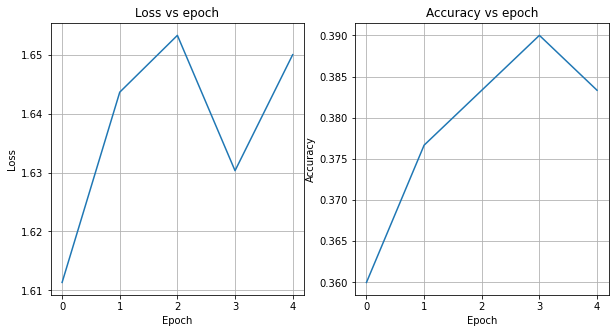

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   5   6   7   8
row_0                           
0      17   0  0   0   0   0  18
1       0  24  0   0   0   0   7
2       0   0  7   0   0   0  22
3       0   0  0   0   0   0  26
4       0   0  0   0   0   0  36
5       0   0  0  10   0   0  14
6       0   0  0   0  14   0  16
7       0   0  0   0   0  20   5
8       0   0  0   0   0   0  37
9       0   0  0   0   0   0  27
313/313 - 0s - loss: 3.7824 - accuracy: 0.4028
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.08289158 0.04060578 0.10195838 0.134251   0.13482581 0.09270959
  0.08230677 0.06115027 0.13750179 0.13179907]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.08289158 0.04060578 0.10195838 ... 0.06115027 0.13750179 0.13179907]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.08289158 0.04060578 0

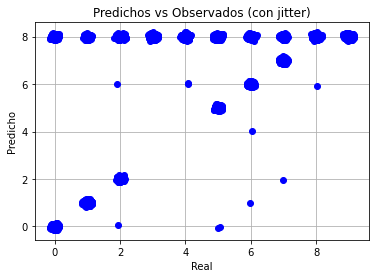

Matriz de confusión:
col_0    0    1    2  4    5    6    7     8
row_0                                       
0      468    0    0  0    0    0    0   512
1        0  920    0  0    0    0    0   215
2        1    0  334  0    0    1    0   696
3        0    0    0  0    0    0    0  1010
4        0    0    0  0    0    2    0   980
5        2    0    0  0  284    0    0   606
6        0    1    0  1    0  407    0   549
7        0    0    1  0    0    0  642   385
8        0    0    0  0    0    1    0   973
9        0    0    0  0    0    0    0  1009
Accuracy =  0.2107
******************************************************************************************




Adagrad : 0.001
Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6169 - accuracy: 0.3933
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7112 - accuracy: 0.3600
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6302 - accuracy: 0.3900
Epoch 4/5
10/10 [=

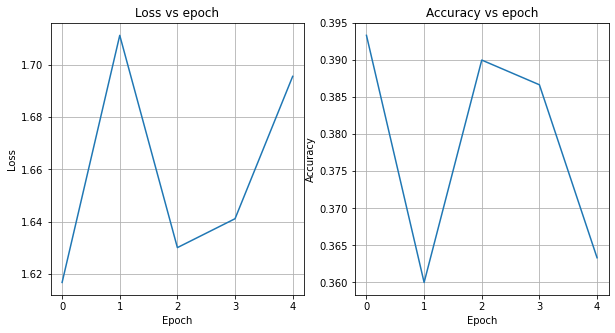

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   5   6   7   8
row_0                           
0      17   0  0   0   0   0  18
1       0  24  0   0   0   0   7
2       0   0  7   0   0   0  22
3       0   0  0   0   0   0  26
4       0   0  0   0   0   0  36
5       0   0  0  10   0   0  14
6       0   0  0   0  14   0  16
7       0   0  0   0   0  20   5
8       0   0  0   0   0   0  37
9       0   0  0   0   0   0  27
313/313 - 0s - loss: 3.7824 - accuracy: 0.4028
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.08303877 0.0405886  0.10196503 0.13406323 0.1351147  0.09245569
  0.08226191 0.06108711 0.13774596 0.131679  ]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.08303877 0.0405886  0.10196503 ... 0.06108711 0.13774596 0.131679  ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.08303877 0.0405886  0

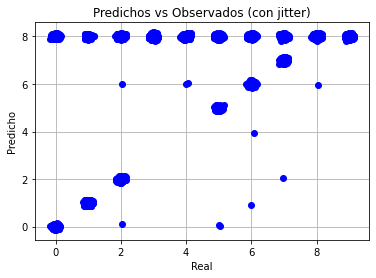

Matriz de confusión:
col_0    0    1    2  4    5    6    7     8
row_0                                       
0      468    0    0  0    0    0    0   512
1        0  920    0  0    0    0    0   215
2        1    0  334  0    0    1    0   696
3        0    0    0  0    0    0    0  1010
4        0    0    0  0    0    2    0   980
5        2    0    0  0  284    0    0   606
6        0    1    0  1    0  407    0   549
7        0    0    1  0    0    0  642   385
8        0    0    0  0    0    1    0   973
9        0    0    0  0    0    0    0  1009
Accuracy =  0.2107
******************************************************************************************




Adadelta : 0.001
Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6371 - accuracy: 0.3867
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6683 - accuracy: 0.3733
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6767 - accuracy: 0.3733
Epoch 4/5
10/10 [

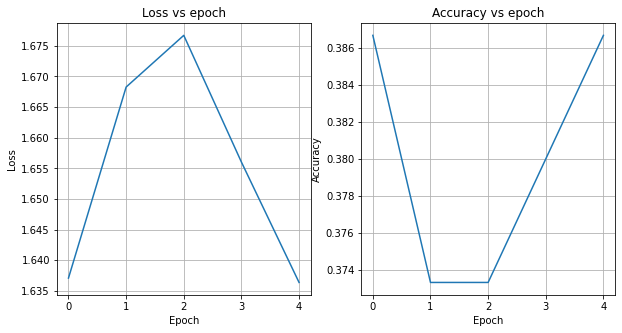

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   5   6   7   8
row_0                           
0      17   0  0   0   0   0  18
1       0  24  0   0   0   0   7
2       0   0  7   0   0   0  22
3       0   0  0   0   0   0  26
4       0   0  0   0   0   0  36
5       0   0  0  10   0   0  14
6       0   0  0   0  14   0  16
7       0   0  0   0   0  20   5
8       0   0  0   0   0   0  37
9       0   0  0   0   0   0  27
313/313 - 0s - loss: 3.7824 - accuracy: 0.4028
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.08303877 0.0405886  0.10196503 0.13406323 0.1351147  0.09245569
  0.08226191 0.06108711 0.13774596 0.131679  ]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.08303877 0.0405886  0.10196503 ... 0.06108711 0.13774596 0.131679  ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.08303877 0.0405886  0

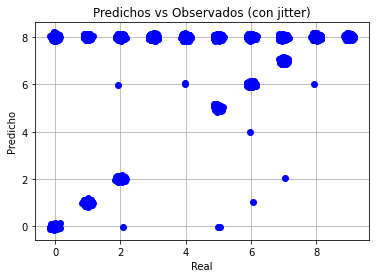

Matriz de confusión:
col_0    0    1    2  4    5    6    7     8
row_0                                       
0      468    0    0  0    0    0    0   512
1        0  920    0  0    0    0    0   215
2        1    0  334  0    0    1    0   696
3        0    0    0  0    0    0    0  1010
4        0    0    0  0    0    2    0   980
5        2    0    0  0  284    0    0   606
6        0    1    0  1    0  407    0   549
7        0    0    1  0    0    0  642   385
8        0    0    0  0    0    1    0   973
9        0    0    0  0    0    0    0  1009
Accuracy =  0.2107
******************************************************************************************




SGD : 0.1
Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6365 - accuracy: 0.3900
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6353 - accuracy: 0.3567
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.5876 - accuracy: 0.4033
Epoch 4/5
10/10 [=======

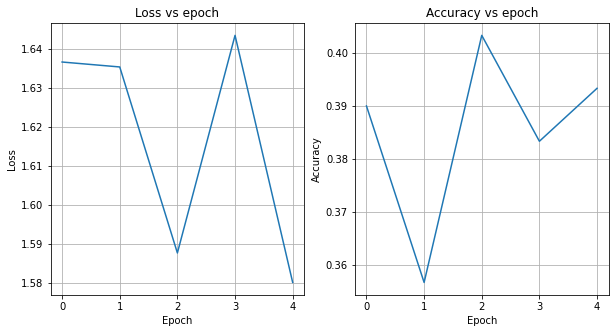

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   5   6   7   8
row_0                           
0      17   0  0   0   0   0  18
1       0  24  0   0   0   0   7
2       0   0  7   0   0   0  22
3       0   0  0   0   0   0  26
4       0   0  0   0   0   0  36
5       0   0  0  10   0   0  14
6       0   0  0   0  14   0  16
7       0   0  0   0   0  20   5
8       0   0  0   0   0   0  37
9       0   0  0   0   0   0  27
313/313 - 0s - loss: 3.7837 - accuracy: 0.4028
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.08553752 0.04030654 0.10112056 0.12681812 0.14545095 0.0847166
  0.08144133 0.05518    0.15328963 0.12613879]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.08553752 0.04030654 0.10112056 ... 0.05518    0.15328963 0.12613879]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.08553752 0.04030654 0.

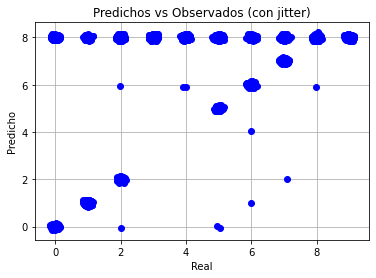

Matriz de confusión:
col_0    0    1    2  4    5    6    7     8
row_0                                       
0      468    0    0  0    0    0    0   512
1        0  920    0  0    0    0    0   215
2        1    0  334  0    0    1    0   696
3        0    0    0  0    0    0    0  1010
4        0    0    0  0    0    2    0   980
5        2    0    0  0  284    0    0   606
6        0    1    0  1    0  407    0   549
7        0    0    1  0    0    0  642   385
8        0    0    0  0    0    1    0   973
9        0    0    0  0    0    0    0  1009
Accuracy =  0.2107
******************************************************************************************




RSMprop : 0.1
Epoch 1/5
10/10 [==============================] - 0s 5ms/step - loss: 1.6429 - accuracy: 0.3833
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6285 - accuracy: 0.3767
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6012 - accuracy: 0.4000
Epoch 4/5
10/10 [===

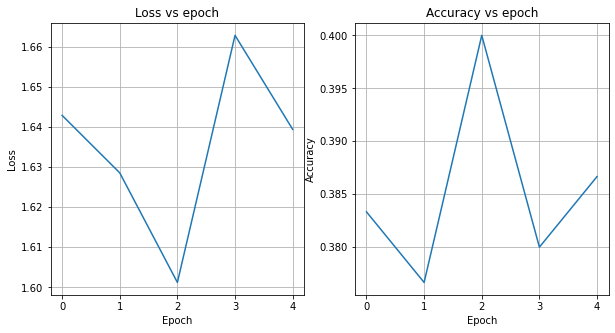

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.7897 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.09573609 0.03942453 0.11326002 0.11774304 0.16279295 0.06913312
  0.0797857  0.0412863  0.13029784 0.15054049]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.09573609 0.03942453 0.11326002 ... 0.0412863  0.13029784 0.15054049]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.09573609 0.03942453 0

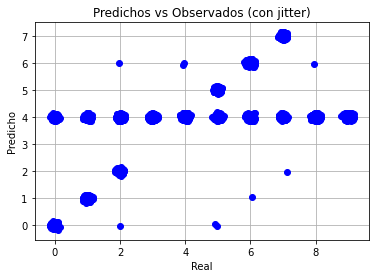

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




Adagrad : 0.1
Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6616 - accuracy: 0.3733
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6297 - accuracy: 0.3833
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7466 - accuracy: 0.3433
Epoch 4/5
10/10 [==============================] - 0s 3m

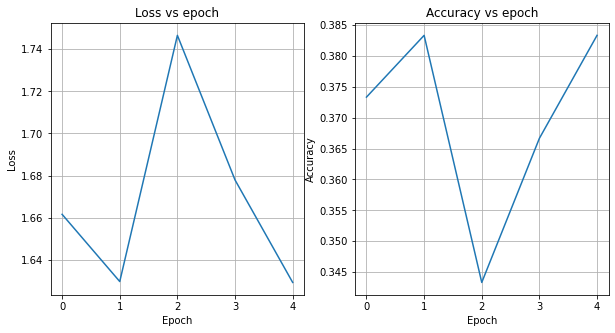

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.7910 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.0984081  0.03996972 0.10776397 0.11670569 0.1649837  0.06942493
  0.08261541 0.04285508 0.15241744 0.12485589]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.0984081  0.03996972 0.10776397 ... 0.04285508 0.15241744 0.12485589]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.0984081  0.03996972 0

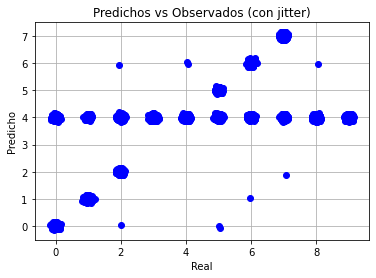

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




Adadelta : 0.1
Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6820 - accuracy: 0.3633
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6689 - accuracy: 0.3700
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6193 - accuracy: 0.3867
Epoch 4/5
10/10 [==============================] - 0s 3

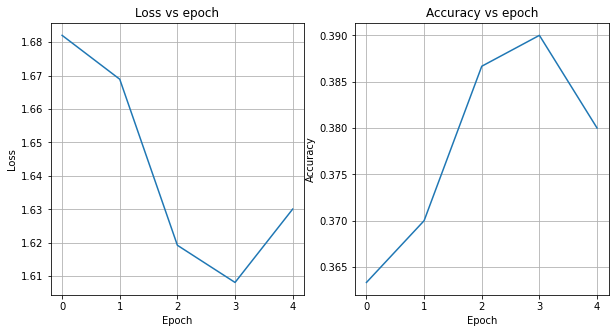

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.7910 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.09839184 0.03999239 0.10769356 0.1167719  0.16491617 0.06943889
  0.08268247 0.04285323 0.1524853  0.12477431]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.09839184 0.03999239 0.10769356 ... 0.04285323 0.1524853  0.12477431]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.09839184 0.03999239 0

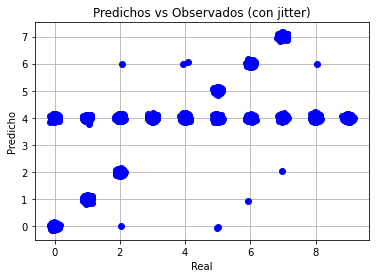

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




SGD : 0.5
Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6947 - accuracy: 0.3467
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6586 - accuracy: 0.3400
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6612 - accuracy: 0.3600
Epoch 4/5
10/10 [==============================] - 0s 3ms/st

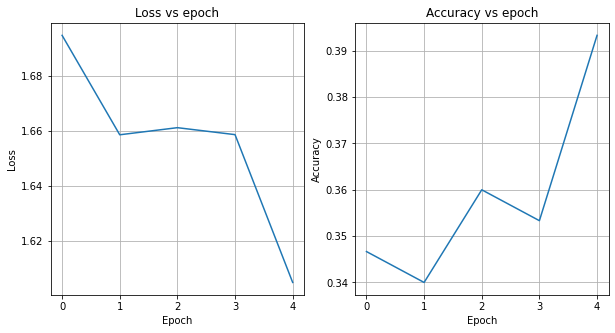

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.7942 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.09739765 0.04106995 0.10059985 0.11193992 0.17552674 0.0654376
  0.08318669 0.0422033  0.15699582 0.12564252]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.09739765 0.04106995 0.10059985 ... 0.0422033  0.15699582 0.12564252]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.09739765 0.04106995 0.

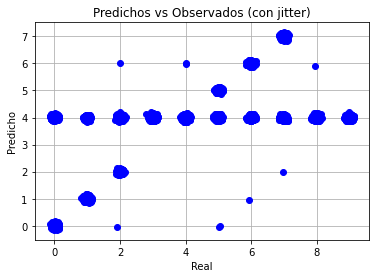

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




RSMprop : 0.5
Epoch 1/5
10/10 [==============================] - 0s 4ms/step - loss: 1.7869 - accuracy: 0.3733
Epoch 2/5
10/10 [==============================] - 0s 5ms/step - loss: 1.7059 - accuracy: 0.3767
Epoch 3/5
10/10 [==============================] - 0s 5ms/step - loss: 1.7564 - accuracy: 0.3567
Epoch 4/5
10/10 [==============================] - 0s 5m

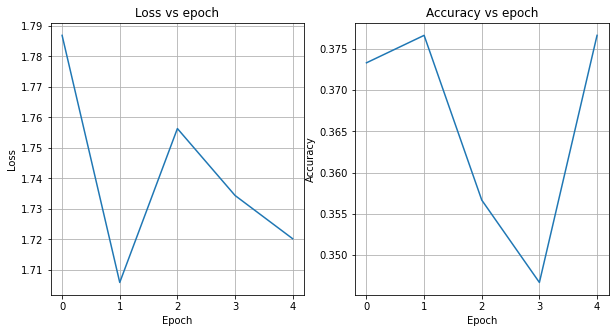

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.9823 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.03139819 0.04535626 0.03597624 0.03719535 0.35527697 0.02921279
  0.06583204 0.04691041 0.21887979 0.13396196]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.03139819 0.04535626 0.03597624 ... 0.04691041 0.21887979 0.13396196]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.03139819 0.04535626 0

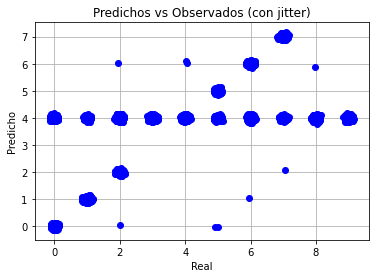

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




Adagrad : 0.5
Epoch 1/5
10/10 [==============================] - 0s 4ms/step - loss: 1.7323 - accuracy: 0.3800
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6803 - accuracy: 0.3467
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6879 - accuracy: 0.3467
Epoch 4/5
10/10 [==============================] - 0s 3m

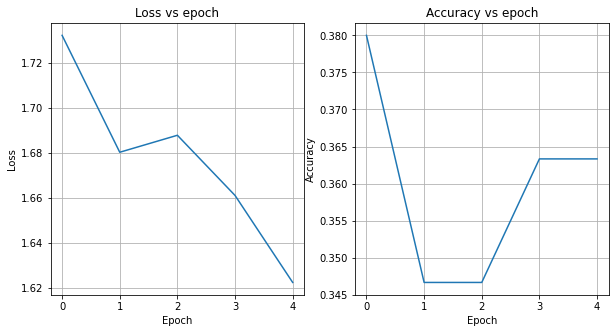

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.7952 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.0961941  0.04377288 0.10039301 0.11451254 0.16433227 0.06357265
  0.0876071  0.03539647 0.161528   0.13269101]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.0961941  0.04377288 0.10039301 ... 0.03539647 0.161528   0.13269101]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.0961941  0.04377288 0

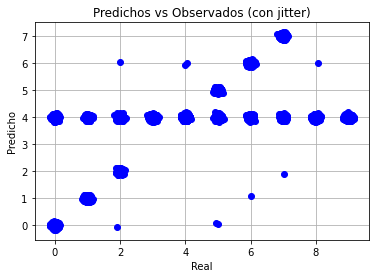

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




Adadelta : 0.5
Epoch 1/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6190 - accuracy: 0.3867
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6419 - accuracy: 0.3767
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6672 - accuracy: 0.3700
Epoch 4/5
10/10 [==============================] - 0s 3

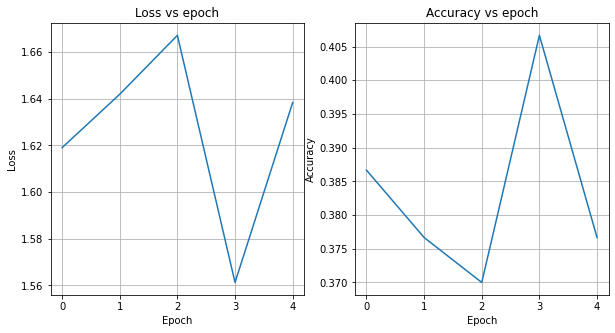

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.7951 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.09611817 0.0435891  0.10066953 0.11495417 0.16396223 0.06383341
  0.08757003 0.03536422 0.16211137 0.13182779]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.09611817 0.0435891  0.10066953 ... 0.03536422 0.16211137 0.13182779]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.09611817 0.0435891  0

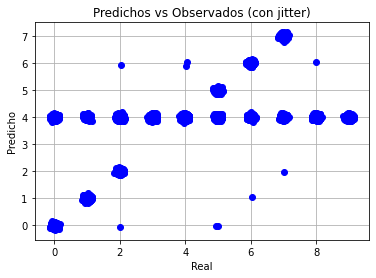

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




SGD : 0.9
Epoch 1/5
10/10 [==============================] - 0s 4ms/step - loss: 1.5956 - accuracy: 0.4000
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6165 - accuracy: 0.3900
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.5798 - accuracy: 0.3933
Epoch 4/5
10/10 [==============================] - 0s 3ms/st

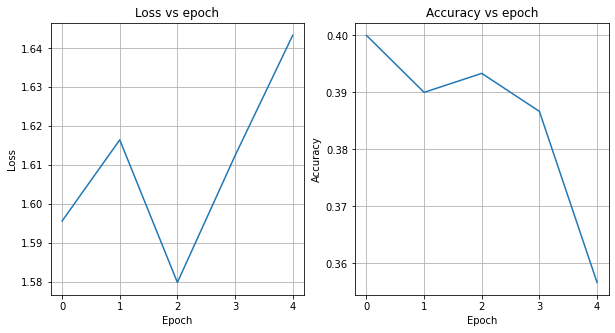

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.7962 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.09618145 0.04197243 0.10874864 0.11945161 0.1711901  0.0659111
  0.07884675 0.03279607 0.1621389  0.12276293]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.09618145 0.04197243 0.10874864 ... 0.03279607 0.1621389  0.12276293]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.09618145 0.04197243 0.

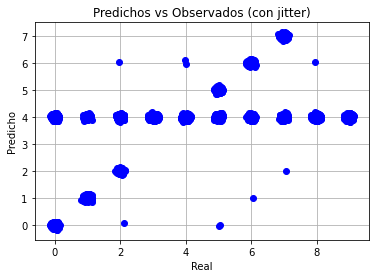

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




RSMprop : 0.9
Epoch 1/5
10/10 [==============================] - 0s 4ms/step - loss: 2.0883 - accuracy: 0.3700
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 1.8760 - accuracy: 0.3067
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 1.7960 - accuracy: 0.3533
Epoch 4/5
10/10 [==============================] - 0s 4m

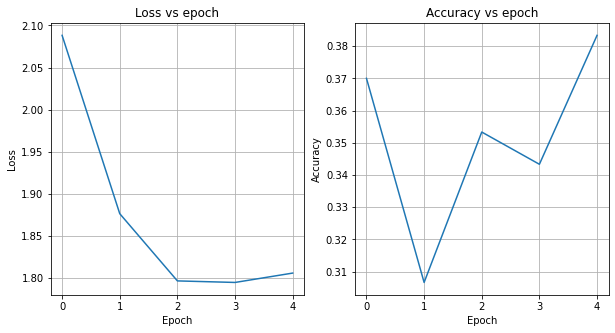

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 4.0812 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.18652537 0.10728262 0.02178515 0.07634455 0.30401975 0.01710145
  0.02608614 0.01140315 0.1872097  0.06224219]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.18652537 0.10728262 0.02178515 ... 0.01140315 0.1872097  0.06224219]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.18652537 0.10728262 0

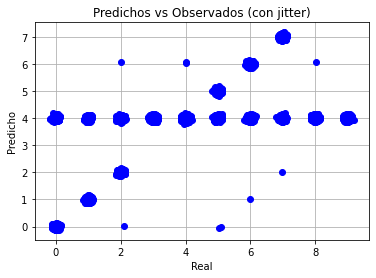

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




Adagrad : 0.9
Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7702 - accuracy: 0.3500
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6377 - accuracy: 0.3933
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6345 - accuracy: 0.3733
Epoch 4/5
10/10 [==============================] - 0s 3m

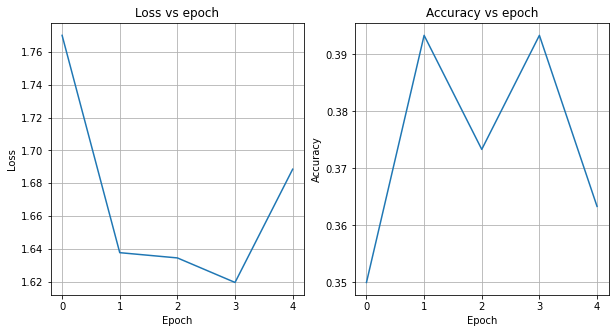

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.8023 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.09954905 0.0467375  0.09043045 0.10405941 0.19113772 0.07215908
  0.07951288 0.03125956 0.15285403 0.13230029]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.09954905 0.0467375  0.09043045 ... 0.03125956 0.15285403 0.13230029]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.09954905 0.0467375  0

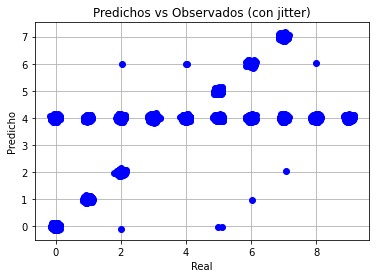

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




Adadelta : 0.9
Epoch 1/5
10/10 [==============================] - 0s 4ms/step - loss: 1.5920 - accuracy: 0.3933
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6361 - accuracy: 0.3800
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6203 - accuracy: 0.3833
Epoch 4/5
10/10 [==============================] - 0s 4

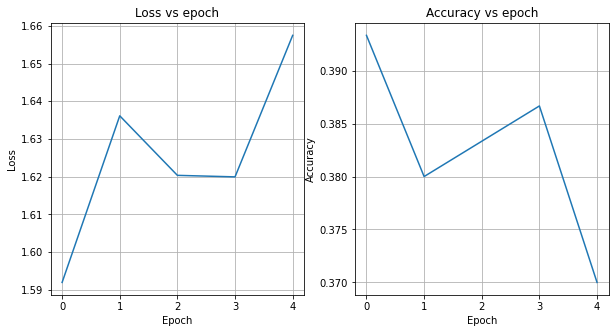

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.8013 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.10031865 0.04557736 0.09145273 0.10533858 0.18755722 0.0725042
  0.0795817  0.03121414 0.15484639 0.13160907]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.10031865 0.04557736 0.09145273 ... 0.03121414 0.15484639 0.13160907]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.10031865 0.04557736 0.

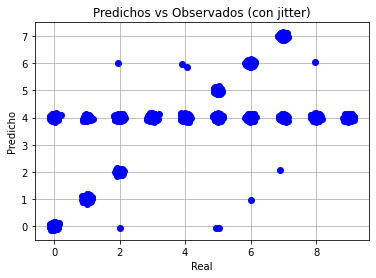

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




SGD : 1.5
Epoch 1/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6575 - accuracy: 0.3633
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6682 - accuracy: 0.3667
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6532 - accuracy: 0.3567
Epoch 4/5
10/10 [==============================] - 0s 4ms/st

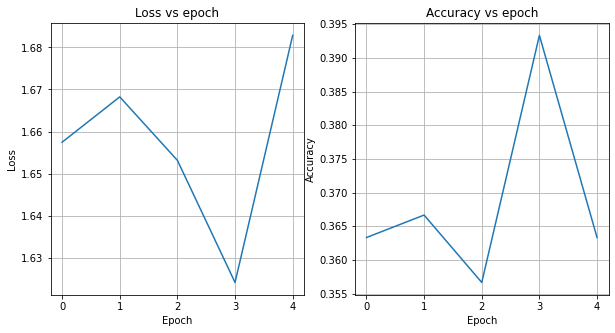

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 3.7939 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.08184287 0.04031289 0.09965364 0.11056266 0.18642768 0.0709849
  0.07807595 0.03889652 0.16338108 0.12986183]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.08184287 0.04031289 0.09965364 ... 0.03889652 0.16338108 0.12986183]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.08184287 0.04031289 0.

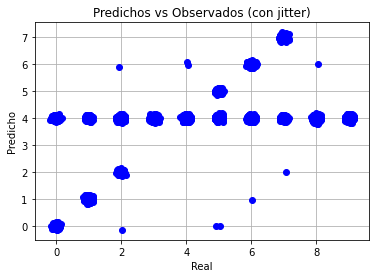

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




RSMprop : 1.5
Epoch 1/5
10/10 [==============================] - 0s 4ms/step - loss: 2.6285 - accuracy: 0.3700
Epoch 2/5
10/10 [==============================] - 0s 5ms/step - loss: 2.0665 - accuracy: 0.3500
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 1.8661 - accuracy: 0.3533
Epoch 4/5
10/10 [==============================] - 0s 4m

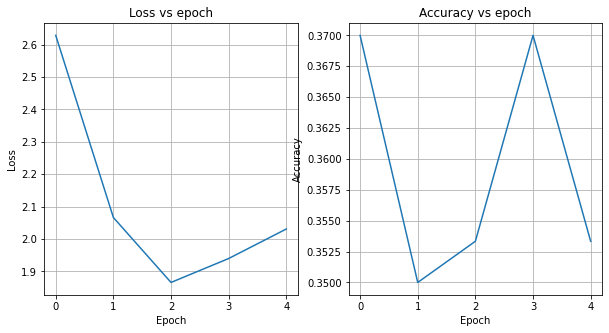

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   4   5   6   7
row_0                           
0      17   0  0  18   0   0   0
1       0  24  0   7   0   0   0
2       0   0  7  22   0   0   0
3       0   0  0  26   0   0   0
4       0   0  0  36   0   0   0
5       0   0  0  14  10   0   0
6       0   0  0  16   0  14   0
7       0   0  0   5   0   0  20
8       0   0  0  37   0   0   0
9       0   0  0  27   0   0   0
313/313 - 0s - loss: 4.4401 - accuracy: 0.4035
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.02744124 0.00485491 0.01774337 0.01065861 0.72326475 0.01612006
  0.01691844 0.01374117 0.08966933 0.07958823]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.02744124 0.00485491 0.01774337 ... 0.01374117 0.08966933 0.07958823]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.02744124 0.00485491 0

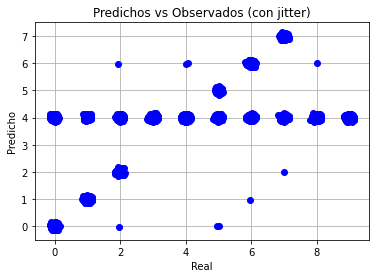

Matriz de confusión:
col_0    0    1    2     4    5    6    7
row_0                                    
0      468    0    0   512    0    0    0
1        0  920    0   215    0    0    0
2        1    0  334   696    0    1    0
3        0    0    0  1010    0    0    0
4        0    0    0   980    0    2    0
5        2    0    0   606  284    0    0
6        0    1    0   550    0  407    0
7        0    0    1   385    0    0  642
8        0    0    0   973    0    1    0
9        0    0    0  1009    0    0    0
Accuracy =  0.2732
******************************************************************************************




Adagrad : 1.5
Epoch 1/5
10/10 [==============================] - 0s 4ms/step - loss: 1.7627 - accuracy: 0.3933
Epoch 2/5
10/10 [==============================] - 0s 5ms/step - loss: 1.6169 - accuracy: 0.3867
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6626 - accuracy: 0.3733
Epoch 4/5
10/10 [==============================] - 0s 5m

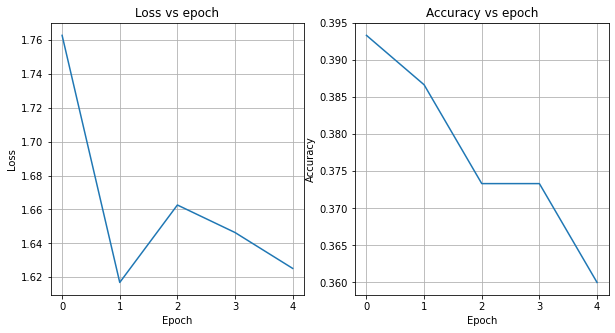

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   5   6   7   8
row_0                           
0      17   0  0   0   0   0  18
1       0  24  0   0   0   0   7
2       0   0  7   0   0   0  22
3       0   0  0   0   0   0  26
4       0   0  0   0   0   0  36
5       0   0  0  10   0   0  14
6       0   0  0   0  14   0  16
7       0   0  0   0   0  20   5
8       0   0  0   0   0   0  37
9       0   0  0   0   0   0  27
313/313 - 0s - loss: 3.8342 - accuracy: 0.4028
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.06644357 0.04173187 0.07709471 0.11779959 0.19502646 0.06026906
  0.07779428 0.02940867 0.2504495  0.0839823 ]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.06644357 0.04173187 0.07709471 ... 0.02940867 0.2504495  0.0839823 ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.06644357 0.04173187 0

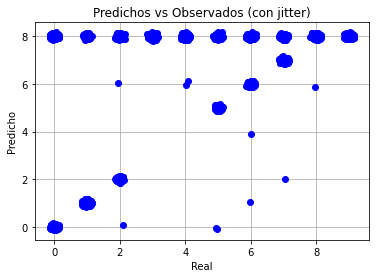

Matriz de confusión:
col_0    0    1    2  4    5    6    7     8
row_0                                       
0      468    0    0  0    0    0    0   512
1        0  920    0  0    0    0    0   215
2        1    0  334  0    0    1    0   696
3        0    0    0  0    0    0    0  1010
4        0    0    0  0    0    2    0   980
5        2    0    0  0  284    0    0   606
6        0    1    0  1    0  407    0   549
7        0    0    1  0    0    0  642   385
8        0    0    0  0    0    1    0   973
9        0    0    0  0    0    0    0  1009
Accuracy =  0.2107
******************************************************************************************




Adadelta : 1.5
Epoch 1/5
10/10 [==============================] - 0s 4ms/step - loss: 1.7301 - accuracy: 0.3600
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6660 - accuracy: 0.3800
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6374 - accuracy: 0.3933
Epoch 4/5
10/10 [==

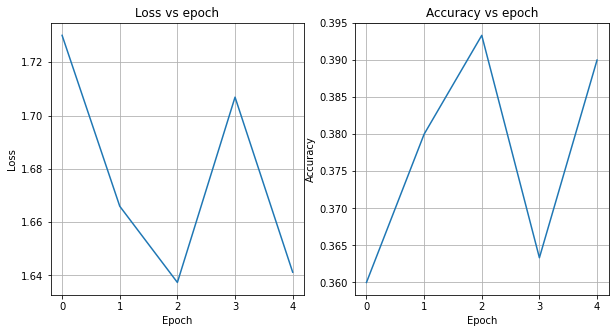

Matriz de confusión luego del aprendizaje:
col_0   0   1  2   5   6   7   8
row_0                           
0      17   0  0   0   0   0  18
1       0  24  0   0   0   0   7
2       0   0  7   0   0   0  22
3       0   0  0   0   0   0  26
4       0   0  0   0   0   0  36
5       0   0  0  10   0   0  14
6       0   0  0   0  14   0  16
7       0   0  0   0   0  20   5
8       0   0  0   0   0   0  37
9       0   0  0   0   0   0  27
313/313 - 0s - loss: 3.8241 - accuracy: 0.4028
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.07079122 0.04194754 0.08066867 0.11913328 0.18979435 0.06198687
  0.07957328 0.03043207 0.23594353 0.08972915]], shape=(2, 10), dtype=float32)
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.07079122 0.04194754 0.08066867 ... 0.03043207 0.23594353 0.08972915]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.07079122 0.04194754 0

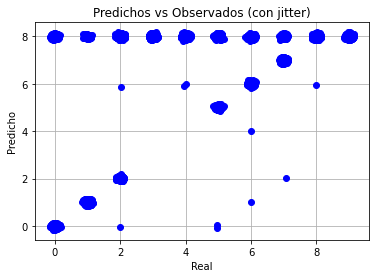

Matriz de confusión:
col_0    0    1    2  4    5    6    7     8
row_0                                       
0      468    0    0  0    0    0    0   512
1        0  920    0  0    0    0    0   215
2        1    0  334  0    0    1    0   696
3        0    0    0  0    0    0    0  1010
4        0    0    0  0    0    2    0   980
5        2    0    0  0  284    0    0   606
6        0    1    0  1    0  407    0   549
7        0    0    1  0    0    0  642   385
8        0    0    0  0    0    1    0   973
9        0    0    0  0    0    0    0  1009
Accuracy =  0.2107
******************************************************************************************






In [ ]:
n = [0.001,0.1,0.5,0.9,1.5]
for i in n:
  modelOptimizadorSGDTasaAprendizaje(i)
  modelOptimizadorRSMpropTasaAprendizaje(i)
  modelOptimizadorAdagramTasaAprendizaje(i)
  modelOptimizadorAdadeltaTasaAprendizaje(i)

En resumen, se observan los resultados del accuracy:

###n 0.001
* SGD 0.3467
* RSMprop 0.3833
* Adagrad 0.3900
* Adadelta 0.3867

###n 0.1
* SGD 0.4033
* RSMprop 0.4000
* Adagrad 0.3833
* Adadelta 0.3900

###n 0.5
* SGD 0.3933
* RSMprop 0.3767
* Adagrad 0.3800
* Adadelta 0.4067

###n 0.9
* SGD 0.4000
* RSMprop 0.3833
* Adagrad 0.3933
* Adadelta 0.3933

###n 1.5
* SGD 0.3933
* RSMprop 0.3700
* Adagrad 0.3933
* Adadelta 0.3900

Variando la tasa de aprendizaje, no se observan cambios significativos en el accuracy de los modelos. Los modelos por separado no parecen cambiar o diferenciarse con su accuracy.

## Entrenando un modelo con menos datos

Se define una fracción del 10% para particionar el conjunto de datos.

In [ ]:
# Selección de una muestra de entrenamiento más pequeña

n_train = x_train.shape[0]
frac = 0.01 # fracción de los datos de entrenamiento que se retienen
n_red = np.round(n_train*frac)
np.random.seed(21) # Fija la semilla del generados de números aleatorios para reproducibilidad
chosen_idx = np.random.choice(n_train, replace = False, size = int(n_red))

Se define el conjunto de entrenamiento y prueba con la cantidad de datos previamente reducidos.

In [ ]:
x_train_reduced = x_train[chosen_idx,:,:]
y_train_reduced = y_train[chosen_idx]

Se define nuevamente el modelo de red neuronal con los mismo parámetros del modelo inicial

In [ ]:
# Crea el objeto 'model_red', que es una red secuencial que se entrenará con menos datos.
model_red = tf.keras.models.Sequential([                
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # Convierte una matriz en un vector
  tf.keras.layers.Dense(128, activation='relu'),   # Crea una capa de 128 neurones
  tf.keras.layers.Dropout(0.2),                    # Define que en cada iteración el 20% de las neuronas no cambian
  tf.keras.layers.Dense(10)                        # Define 10 neuronas en la capa de salida
])

## SGD RSMprop Adagram Adadelta η=0.001,0.1,0.5,0.9,1.5

Se crea cada optimizador de acuerdo al modelo reducido. Se correrá con las mismas tasas de aprendizaje y se evaluarán los resultados.

## SGD

In [ ]:
def modelRedOptimizadorSGDTasaAprendizaje(n):
  # Aquí se compila el modelo diciendo cuál es el optimizador,
  # la función de costo y la métrica que se debe evaluar:
  print("SGD : "+str(n))
  model_red.compile(optimizer=keras.optimizers.SGD(learning_rate=n),
              loss=loss_fn,
              metrics=['accuracy'])
  # Aquí se entrena el modelo. Cada muestra del conjunto de entrenamiento pueda ser usada máximo cinco veces:
  history = model_red.fit(x_train_reduced, y_train_reduced, epochs=5)
  # Veamos la gráfica que ilustra cómo transcurrió el proceso de optimización:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Loss vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.plot(history.history['loss'])
  plt.subplot(1,2,2)
  plt.title("Accuracy vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.plot(history.history['accuracy'])
  plt.show()


  


  # Aquí se evalúa el modelo en el conjunto de validación:
  model_red.evaluate(x_test,  y_test, verbose=2)
  # Aquí se crea el un nuevo modelo cuya salida es probabilística (entre 0 y 1). Para ello se combina el modelo
  # anterior con un layer softmax al final
  probability_model = tf.keras.Sequential([
    model_red,
    tf.keras.layers.Softmax()
  ])
  # Predicciones para las dos primeras observaciones del conjunto de prueba
  print(probability_model(x_test[0:2]))


   # Valores de prueba predichos: 
  prediccion_y_test_prob = probability_model(x_test).numpy()
  print(prediccion_y_test_prob)
  # ¿Cuál es la forma de las predicciones?
  print(prediccion_y_test_prob.shape)
  y_test_max_val = np.argmax(prediccion_y_test_prob,axis=1)
  print(y_test_max_val.size)
  plt.title("Predichos vs Observados (con jitter)")
  plt.xlabel('Real')
  plt.ylabel('Predicho')
  plt.grid(True)
  plt.plot(y_test+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         y_test_max_val+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         'bo')
  #plt.legend(loc=0)
  plt.show()
  df_confusion = pd.crosstab(y_test, y_test_max_val)
  print('Matriz de confusión:')
  print(df_confusion)
  accuracy_val = sum(np.diag(df_confusion))/len(y_test)
  print('Accuracy = ', accuracy_val)
  print('******************************************************************************************')
  print('\n')
  print('\n')

##RSMprop

In [ ]:
def modelRedOptimizadorRSMpropTasaAprendizaje(n):
  # Aquí se compila el modelo diciendo cuál es el optimizador,
  # la función de costo y la métrica que se debe evaluar:
  print("RSMprop : "+str(n))
  model_red.compile(optimizer=keras.optimizers.RMSprop(learning_rate=n),
              loss=loss_fn,
              metrics=['accuracy'])
  # Aquí se entrena el modelo. Cada muestra del conjunto de entrenamiento pueda ser usada máximo cinco veces:
  history = model_red.fit(x_train_reduced, y_train_reduced, epochs=5)
  # Veamos la gráfica que ilustra cómo transcurrió el proceso de optimización:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Loss vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.plot(history.history['loss'])
  plt.subplot(1,2,2)
  plt.title("Accuracy vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.plot(history.history['accuracy'])
  plt.show()
  

  
  # Aquí se evalúa el modelo en el conjunto de validación:
  model_red.evaluate(x_test,  y_test, verbose=2)
  # Aquí se crea el un nuevo modelo cuya salida es probabilística (entre 0 y 1). Para ello se combina el modelo
  # anterior con un layer softmax al final
  probability_model = tf.keras.Sequential([
    model_red,
    tf.keras.layers.Softmax()
  ])
  # Predicciones para las dos primeras observaciones del conjunto de prueba
  print(probability_model(x_test[0:2]))
  # Valores de prueba predichos: 
  prediccion_y_test_prob = probability_model(x_test).numpy()
  print(prediccion_y_test_prob)
  # ¿Cuál es la forma de las predicciones?
  print(prediccion_y_test_prob.shape)
  y_test_max_val = np.argmax(prediccion_y_test_prob,axis=1)
  print(y_test_max_val.size)
  plt.title("Predichos vs Observados (con jitter)")
  plt.xlabel('Real')
  plt.ylabel('Predicho')
  plt.grid(True)
  plt.plot(y_test+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         y_test_max_val+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         'bo')
  #plt.legend(loc=0)
  plt.show()
  df_confusion = pd.crosstab(y_test, y_test_max_val)
  print('Matriz de confusión:')
  print(df_confusion)
  accuracy_val = sum(np.diag(df_confusion))/len(y_test)
  print('Accuracy = ', accuracy_val)
  print('******************************************************************************************')
  print('\n')
  print('\n')

##Adagrad

In [ ]:
def modelRedOptimizadorAdagramTasaAprendizaje(n):
  # Aquí se compila el modelo diciendo cuál es el optimizador,
  # la función de costo y la métrica que se debe evaluar:
  print("Adagrad : "+str(n))
  model_red.compile(optimizer=keras.optimizers.Adagrad(learning_rate=n),
              loss=loss_fn,
              metrics=['accuracy'])
  # Aquí se entrena el modelo. Cada muestra del conjunto de entrenamiento pueda ser usada máximo cinco veces:
  history = model_red.fit(x_train_reduced, y_train_reduced, epochs=5)
  # Veamos la gráfica que ilustra cómo transcurrió el proceso de optimización:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Loss vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.plot(history.history['loss'])
  plt.subplot(1,2,2)
  plt.title("Accuracy vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.plot(history.history['accuracy'])
  plt.show()
  
  
  # Aquí se evalúa el modelo en el conjunto de validación:
  model_red.evaluate(x_test,  y_test, verbose=2)
  # Aquí se crea el un nuevo modelo cuya salida es probabilística (entre 0 y 1). Para ello se combina el modelo
  # anterior con un layer softmax al final
  probability_model = tf.keras.Sequential([
    model_red,
    tf.keras.layers.Softmax()
  ])
  # Predicciones para las dos primeras observaciones del conjunto de prueba
  print(probability_model(x_test[0:2]))
  # Valores de prueba predichos: 
  prediccion_y_test_prob = probability_model(x_test).numpy()
  print(prediccion_y_test_prob)
  # ¿Cuál es la forma de las predicciones?
  print(prediccion_y_test_prob.shape)
  y_test_max_val = np.argmax(prediccion_y_test_prob,axis=1)
  print(y_test_max_val.size)
  plt.title("Predichos vs Observados (con jitter)")
  plt.xlabel('Real')
  plt.ylabel('Predicho')
  plt.grid(True)
  plt.plot(y_test+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         y_test_max_val+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         'bo')
  #plt.legend(loc=0)
  plt.show()
  df_confusion = pd.crosstab(y_test, y_test_max_val)
  print('Matriz de confusión:')
  print(df_confusion)
  accuracy_val = sum(np.diag(df_confusion))/len(y_test)
  print('Accuracy = ', accuracy_val)
  print('******************************************************************************************')
  print('\n')
  print('\n')

##Adadelta

In [ ]:
def modelRedOptimizadorAdadeltaTasaAprendizaje(n):
  # Aquí se compila el modelo diciendo cuál es el optimizador,
  # la función de costo y la métrica que se debe evaluar:
  print("Adadelta : "+str(n))
  model_red.compile(optimizer=keras.optimizers.Adadelta(learning_rate=n),
              loss=loss_fn,
              metrics=['accuracy'])
  # Aquí se entrena el modelo. Cada muestra del conjunto de entrenamiento pueda ser usada máximo cinco veces:
  history = model_red.fit(x_train_reduced, y_train_reduced, epochs=5)
  # Veamos la gráfica que ilustra cómo transcurrió el proceso de optimización:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Loss vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.plot(history.history['loss'])
  plt.subplot(1,2,2)
  plt.title("Accuracy vs epoch")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.plot(history.history['accuracy'])
  plt.show()
 
  # Aquí se evalúa el modelo en el conjunto de validación:
  model_red.evaluate(x_test,  y_test, verbose=2)
  # Aquí se crea el un nuevo modelo cuya salida es probabilística (entre 0 y 1). Para ello se combina el modelo
  # anterior con un layer softmax al final
  probability_model = tf.keras.Sequential([
    model_red,
    tf.keras.layers.Softmax()
  ])
  # Predicciones para las dos primeras observaciones del conjunto de prueba
  print(probability_model(x_test[0:2]))
  # Valores de prueba predichos: 
  prediccion_y_test_prob = probability_model(x_test).numpy()
  print(prediccion_y_test_prob)
  # ¿Cuál es la forma de las predicciones?
  print(prediccion_y_test_prob.shape)
  y_test_max_val = np.argmax(prediccion_y_test_prob,axis=1)
  print(y_test_max_val.size)
  plt.title("Predichos vs Observados (con jitter)")
  plt.xlabel('Real')
  plt.ylabel('Predicho')
  plt.grid(True)
  plt.plot(y_test+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         y_test_max_val+np.random.normal(loc=0,scale=0.05,size=len(y_test)),
         'bo')
  #plt.legend(loc=0)
  plt.show()
  df_confusion = pd.crosstab(y_test, y_test_max_val)
  print('Matriz de confusión:')
  print(df_confusion)
  accuracy_val = sum(np.diag(df_confusion))/len(y_test)
  print('Accuracy = ', accuracy_val)
  print('******************************************************************************************')
  print('\n')
  print('\n')

Paso de cada optimizador por los elementos de la tasa de aprendizaje.

SGD : 0.001
Epoch 1/5
19/19 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9917
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.9883
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9917
Epoch 4/5
19/19 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9883
Epoch 5/5
19/19 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9933


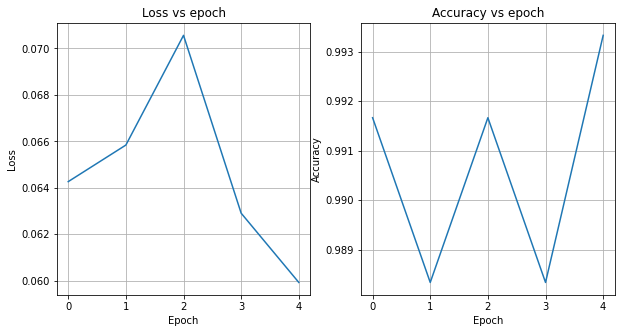

313/313 - 0s - loss: 0.4280 - accuracy: 0.8785
tf.Tensor(
[[9.2397386e-06 1.1317483e-07 1.1139191e-06 1.4639970e-06 1.0480730e-06
  8.1115417e-07 1.8708322e-09 9.9987149e-01 6.3372300e-07 1.1398913e-04]
 [2.0890923e-03 2.4949090e-06 6.2602699e-01 8.9069549e-04 1.8283309e-07
  3.5605772e-05 3.6880174e-01 6.9181811e-09 2.1531214e-03 5.2733668e-08]], shape=(2, 10), dtype=float32)
[[9.23973039e-06 1.13174714e-07 1.11391910e-06 ... 9.99871492e-01
  6.33723005e-07 1.13989132e-04]
 [2.08909460e-03 2.49491177e-06 6.26026571e-01 ... 6.91818913e-09
  2.15312419e-03 5.27336326e-08]
 [1.08961409e-04 9.83016551e-01 8.99492018e-03 ... 1.64618553e-03
  1.44987064e-03 2.43395916e-04]
 ...
 [1.38019345e-07 1.96577503e-06 1.50264295e-05 ... 5.51902631e-05
  2.55755847e-03 4.16847365e-03]
 [1.81436585e-03 1.33924838e-03 1.15052657e-03 ... 7.35058566e-05
  9.10985529e-01 2.00092509e-05]
 [7.95593621e-07 6.20705310e-13 7.03628211e-06 ... 1.37537483e-13
  1.90370453e-09 1.07316367e-09]]
(10000, 10)
10000


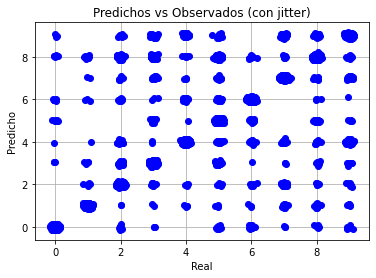

Matriz de confusión:
col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      952     0    0    3    1    7    8    0    6    3
1        0  1111    5    4    1    0    3    2    9    0
2        9     2  869   20   18    0   12    7   87    8
3        3     2   12  852    2   15    3   14   76   31
4        0     4    4    0  884    1   22    3    8   56
5       11     5    6   60   17  614   21   12  131   15
6       19     3    9    1   17   19  880    0   10    0
7        3    14   29    3   20    0    0  871   10   78
8        6    12    5    7   13   17    4   10  873   27
9        6     5    6    6   53    4    1   26   23  879
Accuracy =  0.8785
******************************************************************************************




RSMprop : 0.001
Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9917
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - los

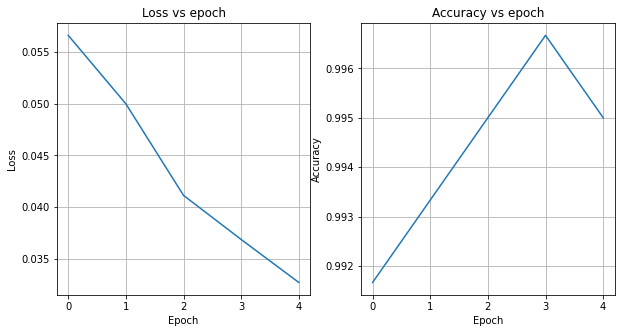

313/313 - 0s - loss: 0.4362 - accuracy: 0.8829
tf.Tensor(
[[1.2085364e-06 5.5969327e-09 6.2806095e-08 1.7036197e-07 1.6984828e-08
  1.0130392e-07 2.7061615e-11 9.9999237e-01 2.9931680e-08 6.0410516e-06]
 [1.4760413e-03 2.9291232e-07 5.4250115e-01 4.1437661e-04 1.5402094e-08
  4.5637166e-06 4.5502102e-01 8.9354585e-10 5.8248988e-04 3.6449175e-09]], shape=(2, 10), dtype=float32)
[[1.2085329e-06 5.5969220e-09 6.2806095e-08 ... 9.9999237e-01
  2.9931567e-08 6.0410403e-06]
 [1.4760402e-03 2.9291181e-07 5.4250127e-01 ... 8.9354601e-10
  5.8248919e-04 3.6449115e-09]
 [3.5355271e-05 9.9485379e-01 2.5364244e-03 ... 7.1413553e-04
  3.5935696e-04 7.7135424e-05]
 ...
 [7.0215741e-08 6.6587592e-07 7.9596366e-06 ... 7.4432319e-05
  1.3672058e-03 3.7822931e-03]
 [1.6165555e-03 7.4749300e-04 3.4084622e-04 ... 3.2429449e-05
  8.7869024e-01 3.6890478e-06]
 [7.2736334e-08 5.6253910e-15 4.9833085e-07 ... 3.8614369e-15
  3.1251134e-11 2.6651044e-11]]
(10000, 10)
10000


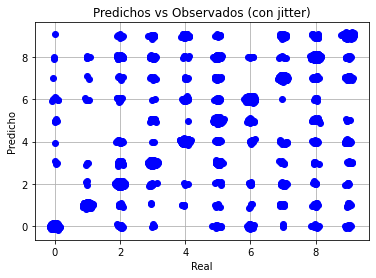

Matriz de confusión:
col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      960     0    0    3    1    5    7    1    2    1
1        0  1117    3    3    0    0    4    2    6    0
2       16     8  865   34   17    0   15    8   61    8
3        4     2   12  885    2   20    2   18   44   21
4        0     6    3    0  882    1   23    5    5   57
5       15     7    5   60   15  650   21   11   96   12
6       30     4    7    0   13   20  878    0    6    0
7        3    12   28    6   12    0    1  900    9   57
8       14    17    5   10   13   35    5   17  829   29
9       14     8    8    9   47    5    0   41   14  863
Accuracy =  0.8829
******************************************************************************************




Adagrad : 0.001
Epoch 1/5
19/19 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 1.0000
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - los

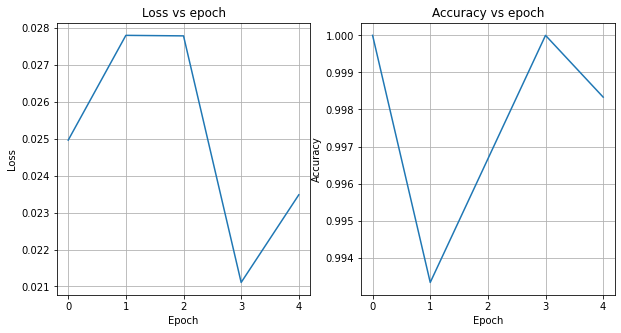

313/313 - 0s - loss: 0.4347 - accuracy: 0.8832
tf.Tensor(
[[1.23198913e-06 5.91693450e-09 6.80116301e-08 1.84163511e-07
  1.71615646e-08 1.11879274e-07 2.81866475e-11 9.99991059e-01
  3.06254968e-08 7.21315701e-06]
 [1.36372098e-03 2.93683939e-07 5.75910270e-01 4.25572303e-04
  1.47505697e-08 4.81369716e-06 4.21737343e-01 8.60141625e-10
  5.57925494e-04 3.83225629e-09]], shape=(2, 10), dtype=float32)
[[1.2319950e-06 5.9169571e-09 6.8012021e-08 ... 9.9999106e-01
  3.0625614e-08 7.2131916e-06]
 [1.3637197e-03 2.9368380e-07 5.7591003e-01 ... 8.6014451e-10
  5.5792578e-04 3.8322621e-09]
 [3.4244804e-05 9.9486154e-01 2.5698796e-03 ... 6.9490127e-04
  3.5011442e-04 7.9181380e-05]
 ...
 [7.0282027e-08 7.1227061e-07 8.9409787e-06 ... 7.3631229e-05
  1.3874498e-03 4.7676996e-03]
 [1.5505486e-03 7.5822056e-04 3.5746599e-04 ... 3.1511310e-05
  8.6776149e-01 3.9784195e-06]
 [7.2538207e-08 6.1260421e-15 5.8247610e-07 ... 3.9734324e-15
  3.2329851e-11 3.2187107e-11]]
(10000, 10)
10000


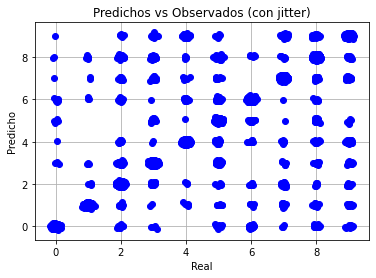

Matriz de confusión:
col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      960     0    0    3    1    5    7    1    2    1
1        0  1117    3    3    0    0    4    2    6    0
2       16     8  869   34   16    0   14    8   59    8
3        4     2   14  886    2   21    1   18   41   21
4        0     6    3    0  877    1   23    5    5   62
5       14     7    5   61   14  652   21   11   95   12
6       30     5    8    0   12   21  876    0    6    0
7        3    12   28    8   12    1    1  894    9   60
8       13    17    5   11   13   36    5   17  826   31
9       12     8    8    9   40    6    0   37   14  875
Accuracy =  0.8832
******************************************************************************************




Adadelta : 0.001
Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9967
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - lo

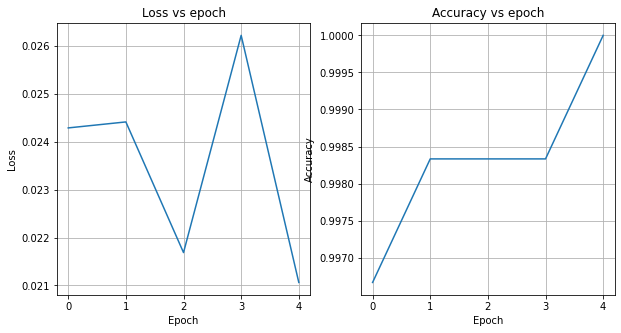

313/313 - 0s - loss: 0.4346 - accuracy: 0.8831
tf.Tensor(
[[1.2310812e-06 5.9297918e-09 6.8355220e-08 1.8495732e-07 1.7169128e-08
  1.1272471e-07 2.8200791e-11 9.9999106e-01 3.0500978e-08 7.2551861e-06]
 [1.3559790e-03 2.9396011e-07 5.7873565e-01 4.2692135e-04 1.4707105e-08
  4.8358788e-06 4.1892236e-01 8.5679780e-10 5.5390643e-04 3.8315027e-09]], shape=(2, 10), dtype=float32)
[[1.2310836e-06 5.9297918e-09 6.8355483e-08 ... 9.9999106e-01
  3.0501038e-08 7.2552066e-06]
 [1.3559794e-03 2.9395963e-07 5.7873577e-01 ... 8.5679797e-10
  5.5390655e-04 3.8315031e-09]
 [3.4108311e-05 9.9486637e-01 2.5711276e-03 ... 6.9272897e-04
  3.4824861e-04 7.9056816e-05]
 ...
 [6.9995131e-08 7.1314741e-07 9.0062504e-06 ... 7.3300114e-05
  1.3739094e-03 4.7906814e-03]
 [1.5498433e-03 7.6193188e-04 3.6012570e-04 ... 3.1513260e-05
  8.6613190e-01 3.9921060e-06]
 [7.2814061e-08 6.1819607e-15 5.9174130e-07 ... 3.9881471e-15
  3.2302976e-11 3.2504957e-11]]
(10000, 10)
10000


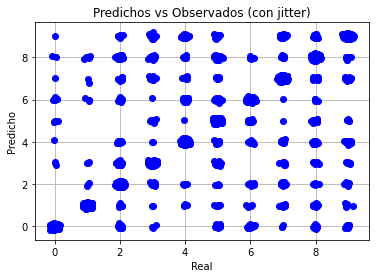

Matriz de confusión:
col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      960     0    0    3    1    5    7    1    2    1
1        0  1117    3    3    0    0    4    2    6    0
2       16     8  869   34   16    0   14    8   59    8
3        4     2   14  886    2   21    1   18   41   21
4        0     6    4    0  876    1   23    5    5   62
5       14     7    5   61   14  652   21   11   95   12
6       30     5    8    0   12   21  876    0    6    0
7        3    12   28    8   12    1    1  894    9   60
8       13    17    5   11   13   36    5   17  826   31
9       12     8    8    9   40    6    0   37   14  875
Accuracy =  0.8831
******************************************************************************************




SGD : 0.1
Epoch 1/5
19/19 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9950
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 0.0

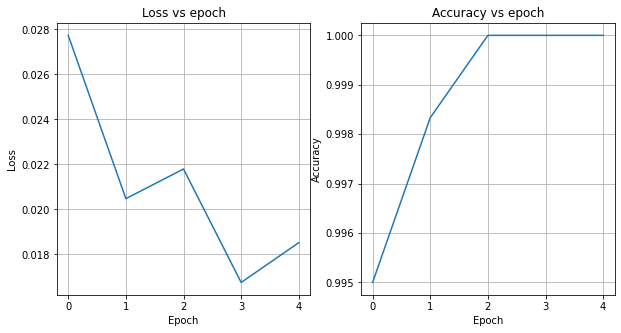

313/313 - 0s - loss: 0.4390 - accuracy: 0.8828
tf.Tensor(
[[9.8685462e-07 5.1044551e-09 5.8575157e-08 1.6939750e-07 1.1122562e-08
  8.3718639e-08 2.1115902e-11 9.9999130e-01 2.1086956e-08 7.3200031e-06]
 [1.0769037e-03 2.2828769e-07 6.4376622e-01 4.6529784e-04 8.0586950e-09
  4.4012527e-06 3.5421717e-01 5.1007526e-10 4.6970989e-04 2.6782778e-09]], shape=(2, 10), dtype=float32)
[[9.8685177e-07 5.1044551e-09 5.8575047e-08 ... 9.9999130e-01
  2.1086915e-08 7.3199890e-06]
 [1.0769040e-03 2.2828765e-07 6.4376611e-01 ... 5.1007515e-10
  4.6971024e-04 2.6782774e-09]
 [2.5947364e-05 9.9553442e-01 2.3312264e-03 ... 5.6624878e-04
  2.7393375e-04 5.9913225e-05]
 ...
 [4.9443091e-08 1.0049804e-06 1.1647636e-05 ... 5.6735171e-05
  1.2167555e-03 4.4737249e-03]
 [1.2134881e-03 7.8079180e-04 3.7714859e-04 ... 2.6767404e-05
  8.0272168e-01 2.5805239e-06]
 [6.4773268e-08 4.8850558e-15 6.8122830e-07 ... 2.0343135e-15
  2.2002513e-11 2.1412178e-11]]
(10000, 10)
10000


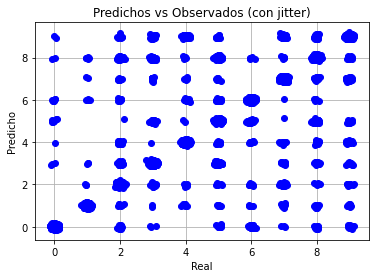

Matriz de confusión:
col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      957     0    0    3    1    9    6    0    2    2
1        0  1117    3    3    0    0    4    2    6    0
2       14     8  873   36   14    1   13    8   57    8
3        3     2   15  887    1   22    0   16   38   26
4        0     7    4    0  859    2   22    6    6   76
5       12     7    6   63   11  670   19    9   83   12
6       30     4   10    0   11   25  873    0    5    0
7        3    14   30    9   10    1    1  884    6   70
8       11    17    6   11   10   43    5   16  819   36
9       12     9    8   11   24    7    0   35   14  889
Accuracy =  0.8828
******************************************************************************************




RSMprop : 0.1
Epoch 1/5
19/19 [==============================] - 0s 4ms/step - loss: 51.6490 - accuracy: 0.4167
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss

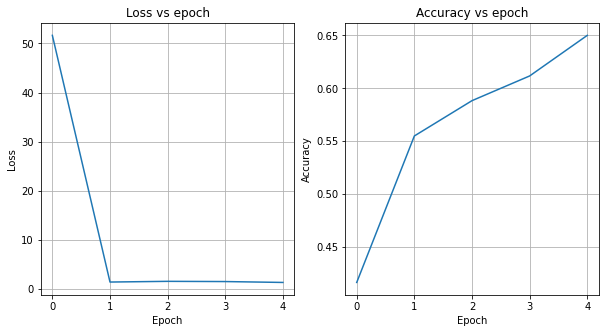

313/313 - 0s - loss: 1.2150 - accuracy: 0.6461
tf.Tensor(
[[1.6335554e-15 5.1010869e-15 7.5601908e-10 2.8361284e-16 1.9536094e-17
  1.2266919e-11 3.3229292e-28 9.9993324e-01 2.4562776e-12 6.6800239e-05]
 [1.8717933e-13 5.2415873e-14 1.0000000e+00 4.4980597e-09 2.7884354e-18
  8.5215174e-13 1.7906256e-08 1.7313957e-14 1.8979845e-08 3.1145629e-16]], shape=(2, 10), dtype=float32)
[[1.6335554e-15 5.1010869e-15 7.5601764e-10 ... 9.9993324e-01
  2.4562776e-12 6.6800239e-05]
 [1.8717826e-13 5.2415574e-14 1.0000000e+00 ... 1.7313824e-14
  1.8979701e-08 3.1145391e-16]
 [1.8272470e-08 9.9873883e-01 6.1169274e-09 ... 2.7029735e-05
  1.1445197e-03 3.2763435e-08]
 ...
 [5.8611713e-02 2.3069248e-02 3.7852746e-02 ... 2.9012784e-02
  2.5818512e-01 3.1978989e-01]
 [5.8611713e-02 2.3069248e-02 3.7852746e-02 ... 2.9012784e-02
  2.5818512e-01 3.1978989e-01]
 [1.6262744e-19 2.1666863e-19 1.4525480e-12 ... 9.8537884e-17
  2.5853873e-14 2.8369660e-13]]
(10000, 10)
10000


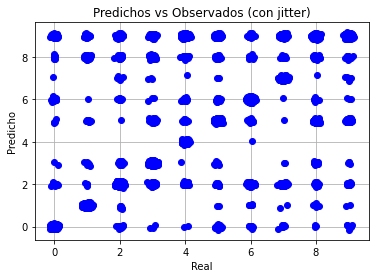

Matriz de confusión:
col_0    0     1    2    3    4    5    6    7   8    9
row_0                                                  
0      829     0   16    2    0    4   19    1   7  102
1        0  1011    5    7    0    9    1    0  77   25
2       12     6  872   21    0    1   11    6  42   61
3        3     0   50  718    0   77    3    3  62   94
4        2     0   19    1  190   14   21    1  13  721
5       30     2   21   12    0  538   15    3  36  235
6        9     5  179    0    1   18  697    0  15   34
7        8     2   71    2    0    1    1  656  14  273
8        3     7   26   18    0  136    9    1  85  689
9        6     2   12    4    0   86    3    9  22  865
Accuracy =  0.6461
******************************************************************************************




Adagrad : 0.1
Epoch 1/5
19/19 [==============================] - 0s 2ms/step - loss: 0.9622 - accuracy: 0.6667
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss: 0.7946 - ac

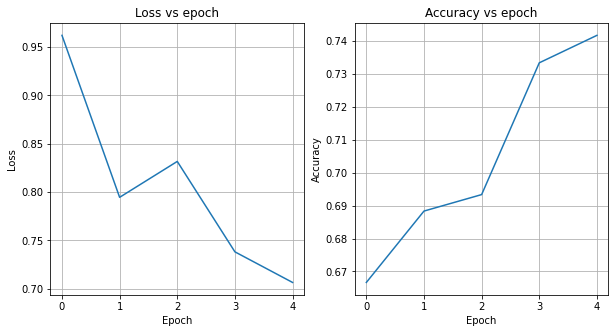

313/313 - 0s - loss: 0.9016 - accuracy: 0.7579
tf.Tensor(
[[3.8296550e-20 1.1051085e-18 1.6127813e-12 4.1489376e-21 4.5148099e-21
  6.9349373e-17 1.1584701e-34 1.0000000e+00 1.2433034e-18 2.1226599e-08]
 [1.7348065e-12 4.3583057e-10 9.9999869e-01 4.9650799e-07 3.1639406e-18
  1.0513647e-12 5.8842687e-07 3.0329550e-12 2.6494416e-07 9.7170071e-17]], shape=(2, 10), dtype=float32)
[[3.8296550e-20 1.1051085e-18 1.6127783e-12 ... 1.0000000e+00
  1.2433082e-18 2.1226599e-08]
 [1.7347999e-12 4.3582890e-10 9.9999869e-01 ... 3.0329435e-12
  2.6494368e-07 9.7170442e-17]
 [8.8886312e-12 9.9999535e-01 1.5560889e-12 ... 1.0908086e-07
  4.4617136e-06 6.4187848e-12]
 ...
 [6.4783156e-02 3.0144721e-02 3.0981310e-02 ... 2.9679487e-02
  2.7670300e-01 2.5600341e-01]
 [6.4783156e-02 3.0144721e-02 3.0981310e-02 ... 2.9679487e-02
  2.7670300e-01 2.5600341e-01]
 [3.3053939e-17 2.1744314e-16 1.5878323e-08 ... 3.8335359e-16
  4.9786479e-14 5.1135003e-14]]
(10000, 10)
10000


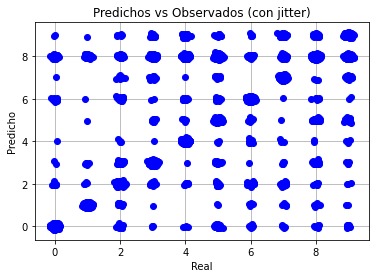

Matriz de confusión:
col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      871     0    7    2    1    0   10    1   86    2
1        0  1056    4    5    0    1    1    0   67    1
2       18    14  841   40    4    0   19   10   80    6
3        3     1   19  791    1   10    2   17  147   19
4        4     0   11    1  580    4   17    1  317   47
5       46     2   13   20    3  455   14    7  317   15
6       13     6   43    1    8   14  822    0   46    5
7        7     5   35    4    3    1    1  807   58  107
8        7    10    8   33    2   48    7    3  823   33
9        7     2    3    5    3   18    2   42  394  533
Accuracy =  0.7579
******************************************************************************************




Adadelta : 0.1
Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.7500
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss

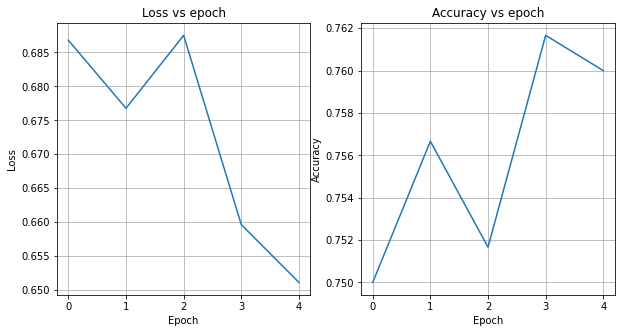

313/313 - 0s - loss: 0.9014 - accuracy: 0.7597
tf.Tensor(
[[2.7807101e-20 9.4759970e-19 1.4992001e-12 3.1350697e-21 3.7871014e-21
  5.1653184e-17 8.8679437e-35 1.0000000e+00 8.6906232e-19 2.1365231e-08]
 [1.2287457e-12 3.8226494e-10 9.9999881e-01 3.9947466e-07 2.2267644e-18
  7.3541157e-13 5.6566989e-07 2.4835459e-12 2.2740683e-07 6.9111079e-17]], shape=(2, 10), dtype=float32)
[[2.7807101e-20 9.4760332e-19 1.4992001e-12 ... 1.0000000e+00
  8.6906232e-19 2.1365272e-08]
 [1.2287411e-12 3.8226350e-10 9.9999881e-01 ... 2.4835366e-12
  2.2740595e-07 6.9110814e-17]
 [6.7051083e-12 9.9999607e-01 1.2448589e-12 ... 8.9780769e-08
  3.7893842e-06 4.7288853e-12]
 ...
 [6.4938009e-02 3.0167621e-02 3.0820325e-02 ... 2.9571764e-02
  2.7714041e-01 2.5531477e-01]
 [6.4938009e-02 3.0167621e-02 3.0820325e-02 ... 2.9571764e-02
  2.7714041e-01 2.5531477e-01]
 [2.4985280e-17 1.5988665e-16 1.3710492e-08 ... 2.7444955e-16
  3.6893804e-14 3.6622198e-14]]
(10000, 10)
10000


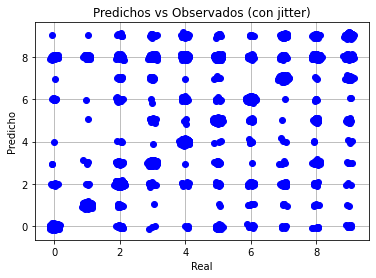

Matriz de confusión:
col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      873     0    7    2    1    0   10    1   85    1
1        0  1059    4    5    0    1    1    0   64    1
2       18    14  842   40    4    0   19   10   79    6
3        3     1   19  793    1   10    2   17  145   19
4        4     0   11    1  582    4   18    1  311   50
5       46     2   13   21    3  455   14    7  315   16
6       14     6   43    1    8   14  821    0   46    5
7        7     5   35    4    3    1    1  806   54  112
8        7    10    8   32    2   48    7    3  823   34
9        8     2    3    5    3   18    2   41  384  543
Accuracy =  0.7597
******************************************************************************************




SGD : 0.5
Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 0.9350 - accuracy: 0.7150
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss: 0.8

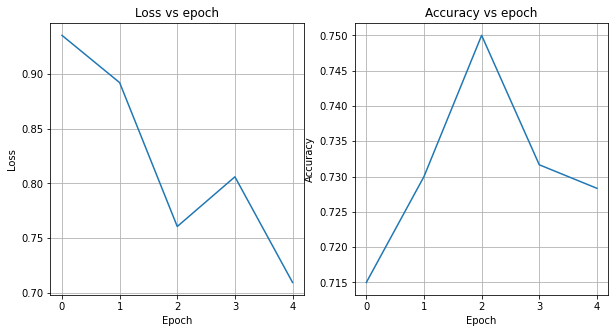

313/313 - 0s - loss: 0.9667 - accuracy: 0.7461
tf.Tensor(
[[4.9813435e-26 2.7644182e-23 1.3582768e-12 1.4812486e-26 1.3889534e-26
  4.1972176e-22 0.0000000e+00 1.0000000e+00 2.2903825e-25 2.7455383e-19]
 [5.7140063e-14 1.5856597e-11 1.0000000e+00 2.4434696e-08 9.9166068e-18
  1.1738902e-13 1.9886542e-11 2.5379110e-11 6.0637899e-09 3.4653051e-17]], shape=(2, 10), dtype=float32)
[[4.9813435e-26 2.7644182e-23 1.3582716e-12 ... 1.0000000e+00
  2.2903738e-25 2.7455280e-19]
 [5.7139847e-14 1.5856537e-11 1.0000000e+00 ... 2.5378965e-11
  6.0637548e-09 3.4653051e-17]
 [7.3136763e-15 1.0000000e+00 8.8308326e-15 ... 3.8777304e-10
  1.9008783e-09 1.7308112e-14]
 ...
 [5.6877777e-02 2.5644260e-02 2.2803452e-02 ... 2.1978136e-02
  3.0604446e-01 2.8257966e-01]
 [5.6877777e-02 2.5644260e-02 2.2803452e-02 ... 2.1978136e-02
  3.0604446e-01 2.8257966e-01]
 [4.9415594e-19 3.6495270e-15 6.4395880e-12 ... 2.3438128e-13
  4.0472359e-13 7.0765812e-15]]
(10000, 10)
10000


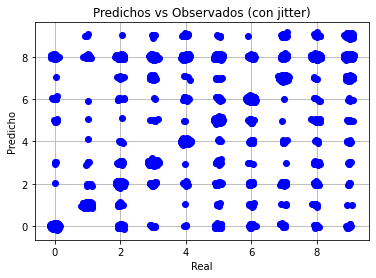

Matriz de confusión:
col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      908     0    1    3    0    5    9    1   53    0
1        0  1079    9    5    1    1    1    0   36    3
2       27    12  834   32    6    1    9   10  100    1
3        5     0   29  804    0    7    2   26  132    5
4        3     1    7    1  686    2   25    4  241   12
5       81     6   16   37    4  424   15   12  291    6
6       22     7   17    3   18   16  822    0   52    1
7       12     4   38    1    6    1    1  850   81   34
8       11     9   15   26    5   32    8    4  846   18
9       11     2    4    6    9   10    5  141  613  208
Accuracy =  0.7461
******************************************************************************************




RSMprop : 0.5
Epoch 1/5
19/19 [==============================] - 0s 4ms/step - loss: 149.9001 - accuracy: 0.3517
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - los

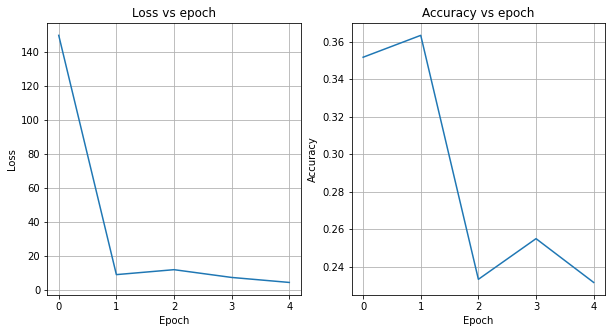

313/313 - 0s - loss: 2.1516 - accuracy: 0.2177
tf.Tensor(
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 4.2994177e-25 0.0000000e+00]
 [2.4345005e-02 2.4422128e-02 9.6457146e-02 2.9185414e-01 5.8824077e-02
  7.9415157e-02 1.5147354e-01 6.2735029e-02 1.3724399e-01 7.3229849e-02]], shape=(2, 10), dtype=float32)
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  4.2994177e-25 0.0000000e+00]
 [2.4345022e-02 2.4422137e-02 9.6457146e-02 ... 6.2735058e-02
  1.3724391e-01 7.3229901e-02]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.4586533e-38
  1.0006752e-23 0.0000000e+00]
 ...
 [6.1197836e-02 3.7573233e-02 7.4219733e-02 ... 1.1027311e-01
  5.9153538e-02 1.9748917e-01]
 [6.1197836e-02 3.7573233e-02 7.4219733e-02 ... 1.1027311e-01
  5.9153538e-02 1.9748917e-01]
 [6.1197836e-02 3.7573233e-02 7.4219733e-02 ... 1.1027311e-01
  5.9153538e-02 1.9748917e-01]]
(10000, 10)
10000


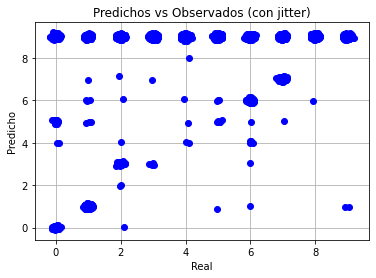

Matriz de confusión:
col_0   0    1  2   3  4   5    6    7  8     9
row_0                                          
0      78    0  0   0  2  17    0    0  0   883
1       0  709  0   0  0   3    3    1  0   419
2       1    0  2  23  1   0    1    1  0  1003
3       0    0  0   5  0   0    0    1  0  1004
4       0    0  0   0  2   1    1    0  1   977
5       0    1  0   0  0   6    3    0  0   882
6       0    1  0   1  4   1  161    0  0   790
7       0    0  0   0  0   1    0  207  0   820
8       0    0  0   0  0   0    1    0  0   973
9       0    2  0   0  0   0    0    0  0  1007
Accuracy =  0.2177
******************************************************************************************




Adagrad : 0.5
Epoch 1/5
19/19 [==============================] - 0s 2ms/step - loss: 2.0398 - accuracy: 0.2217
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss: 2.0010 - accuracy: 0.2333
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 2.0205 - a

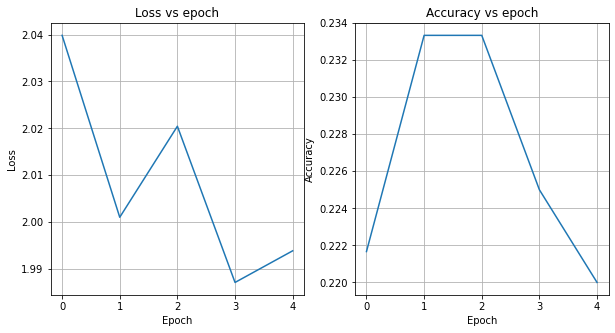

313/313 - 0s - loss: 2.0685 - accuracy: 0.2248
tf.Tensor(
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 9.3398469e-25 0.0000000e+00]
 [3.3948600e-02 4.2651441e-02 1.1747689e-01 2.1703795e-01 4.3478712e-02
  4.2297840e-02 1.9893874e-01 4.1781906e-02 2.2279668e-01 3.9591227e-02]], shape=(2, 10), dtype=float32)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  9.33977489e-25 0.00000000e+00]
 [3.39486375e-02 4.26514708e-02 1.17476910e-01 ... 4.17819433e-02
  2.22796664e-01 3.95912789e-02]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.30088385e-24 0.00000000e+00]
 ...
 [9.99433175e-02 7.68483430e-02 1.05862722e-01 ... 8.60109106e-02
  1.12460986e-01 1.25043139e-01]
 [9.99433175e-02 7.68483430e-02 1.05862722e-01 ... 8.60109106e-02
  1.12460986e-01 1.25043139e-01]
 [9.99433175e-02 7.68483430e-02 1.05862722e-01 ... 8.60109106e-02
  1.12460986e-01 1.25043139e-01]]
(10000, 10)
10000


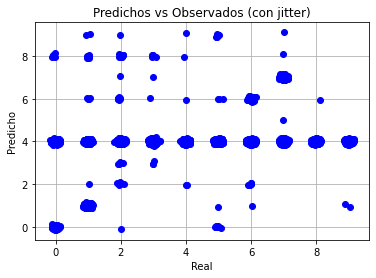

Matriz de confusión:
col_0    0    1  2  3     4  5    6    7   8  9
row_0                                          
0      174    0  0  0   802  0    0    0   4  0
1        0  716  1  0   405  0    4    0   7  2
2        1    0  8  5   996  0    9    1  11  1
3        0    0  0  3  1001  0    1    1   4  0
4        0    0  2  0   977  0    1    0   1  1
5        8    1  0  0   874  0    3    0   0  6
6        0    1  7  0   788  0  162    0   0  0
7        0    0  0  0   817  1    0  208   1  1
8        0    0  0  0   973  0    1    0   0  0
9        0    2  0  0  1007  0    0    0   0  0
Accuracy =  0.2248
******************************************************************************************




Adadelta : 0.5
Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 2.0034 - accuracy: 0.2317
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss: 1.9770 - accuracy: 0.2433
Epoch 3/5
19/19 [==============================] - 0s 3ms/step - loss: 1.9752 - 

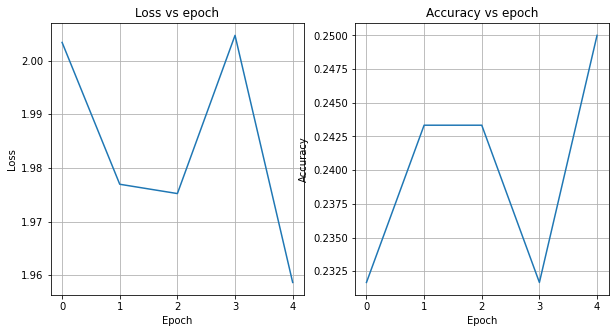

313/313 - 0s - loss: 2.0682 - accuracy: 0.2247
tf.Tensor(
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  9.18424899e-25 0.00000000e+00]
 [3.35140713e-02 4.23878320e-02 1.17237836e-01 2.17392921e-01
  4.32569906e-02 4.23010699e-02 1.97618932e-01 4.15969454e-02
  2.25206837e-01 3.94865088e-02]], shape=(2, 10), dtype=float32)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  9.18424899e-25 0.00000000e+00]
 [3.35141048e-02 4.23878655e-02 1.17237866e-01 ... 4.15969789e-02
  2.25206792e-01 3.94865461e-02]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.45986536e-24 0.00000000e+00]
 ...
 [9.89041328e-02 7.65591934e-02 1.05904356e-01 ... 8.58384892e-02
  1.13954127e-01 1.25015810e-01]
 [9.89041328e-02 7.65591934e-02 1.05904356e-01 ... 8.58384892e-02
  1.13954127e-01 1.25015810e-01]
 [9.89041328e-02 7.65591934e-02 1.05904356e-01 ... 8.58384892e-02
  1.13954127e-01 1.25015810e-0

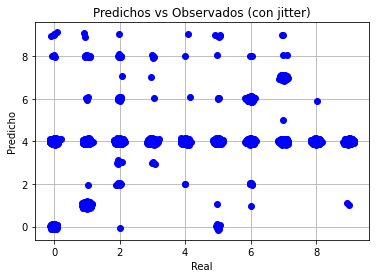

Matriz de confusión:
col_0    0    1  2  3     4  5    6    7   8  9
row_0                                          
0      174    0  0  0   798  0    0    0   4  4
1        0  716  1  0   403  0    3    0  10  2
2        1    0  8  5   996  0    9    1  11  1
3        0    0  0  3  1001  0    1    1   4  0
4        0    0  2  0   977  0    1    0   1  1
5        8    1  0  0   873  0    3    0   1  6
6        0    1  7  0   786  0  162    0   2  0
7        0    0  0  0   816  1    0  207   2  2
8        0    0  0  0   973  0    1    0   0  0
9        0    2  0  0  1007  0    0    0   0  0
Accuracy =  0.2247
******************************************************************************************




SGD : 0.9
Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 2.0027 - accuracy: 0.2250
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.9887 - accuracy: 0.2367
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 1.9748 - accur

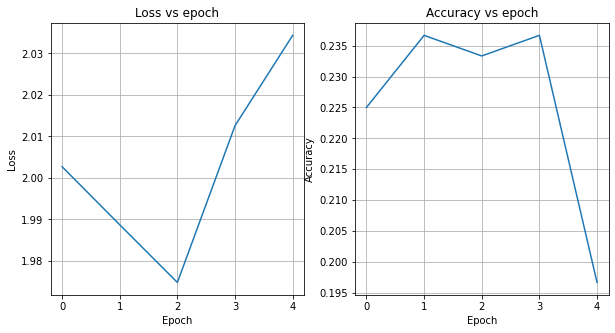

313/313 - 0s - loss: 2.0722 - accuracy: 0.2239
tf.Tensor(
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.1635161e-24 0.0000000e+00]
 [2.8910944e-02 4.2795014e-02 1.0949502e-01 2.0881024e-01 4.1268803e-02
  4.0368646e-02 1.9649909e-01 3.6275357e-02 2.5960803e-01 3.5968892e-02]], shape=(2, 10), dtype=float32)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  1.16351609e-24 0.00000000e+00]
 [2.89109722e-02 4.27950472e-02 1.09495044e-01 ... 3.62753868e-02
  2.59607971e-01 3.59689370e-02]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.08011979e-23 0.00000000e+00]
 ...
 [8.87866467e-02 8.04354399e-02 1.02929182e-01 ... 7.78987333e-02
  1.36698812e-01 1.18506297e-01]
 [8.87866467e-02 8.04354399e-02 1.02929182e-01 ... 7.78987333e-02
  1.36698812e-01 1.18506297e-01]
 [8.87866467e-02 8.04354399e-02 1.02929182e-01 ... 7.78987333e-02
  1.36698812e-01 1.18506297e-01]]
(10000, 10)
10000


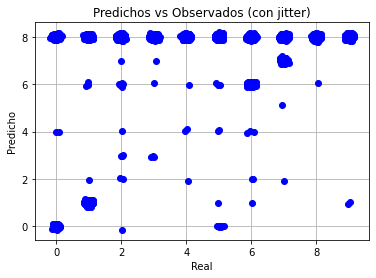

Matriz de confusión:
col_0    0    1  2  3  4  5    6    7     8
row_0                                      
0      174    0  0  0  2  0    0    0   804
1        0  716  1  0  0  0    3    0   415
2        1    0  2  4  1  0    8    1  1015
3        0    0  0  3  0  0    1    1  1005
4        0    0  1  0  2  0    1    0   978
5        7    1  0  0  2  0    3    0   879
6        0    1  2  0  3  0  162    0   790
7        0    0  1  0  0  1    0  207   819
8        0    0  0  0  0  0    1    0   973
9        0    2  0  0  0  0    0    0  1007
Accuracy =  0.2239
******************************************************************************************




RSMprop : 0.9
Epoch 1/5
19/19 [==============================] - 0s 4ms/step - loss: 44.0327 - accuracy: 0.2150
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 2.9128 - accuracy: 0.1817
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 4.5779 - accuracy: 0.1617
Epoch 4/5
19/19 [==============

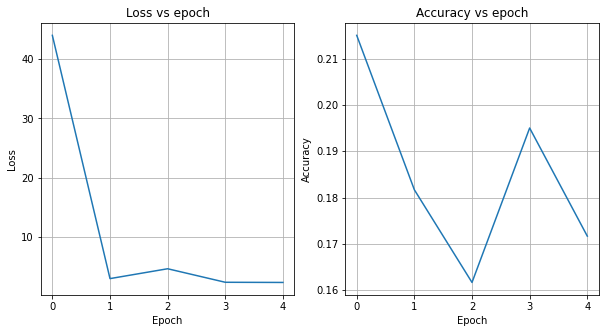

313/313 - 0s - loss: 2.1775 - accuracy: 0.2017
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.05021647 0.0228561  0.14131379 0.17449334 0.04382917 0.04779513
  0.13671044 0.01420332 0.29961857 0.06896371]], shape=(2, 10), dtype=float32)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.02165221e-02 2.28560995e-02 1.41313806e-01 ... 1.42033333e-02
  2.99618453e-01 6.89637512e-02]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 1.94091922e-16
  3.81245709e-19 0.00000000e+00]
 ...
 [1.36923566e-01 3.81419510e-02 1.17943846e-01 ... 2.70804130e-02
  1.40075475e-01 2.01735124e-01]
 [1.36923566e-01 3.81419510e-02 1.17943846e-01 ... 2.70804130e-02
  1.40075475e-01 2.01735124e-01]
 [1.36923566e-01 3.81419510e-02 1.17943846e-01 ... 2.70804130e-02
  1.40075475e-01 2.01735124e-01]]
(10000, 10)
10000


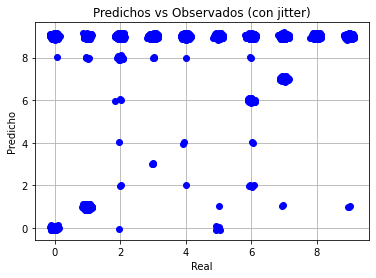

Matriz de confusión:
col_0   0    1  2  3  4   6    7   8     9
row_0                                     
0      88    0  0  0  0   0    0   1   891
1       0  686  0  0  0   0    0   4   445
2       1    0  2  0  1   3    0  23  1002
3       0    0  0  3  0   0    0   3  1004
4       0    0  1  0  2   0    0   1   978
5       7    1  0  0  0   0    0   0   884
6       0    0  4  0  2  46    0   2   904
7       0    2  0  0  0   0  184   0   842
8       0    0  0  0  0   0    0   0   974
9       0    3  0  0  0   0    0   0  1006
Accuracy =  0.1755
******************************************************************************************




Adagrad : 0.9
Epoch 1/5
19/19 [==============================] - 0s 4ms/step - loss: 2.1228 - accuracy: 0.1917
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 2.1345 - accuracy: 0.1783
Epoch 3/5
19/19 [==============================] - 0s 3ms/step - loss: 2.1104 - accuracy: 0.1817
Epoch 4/5
19/19 [===========================

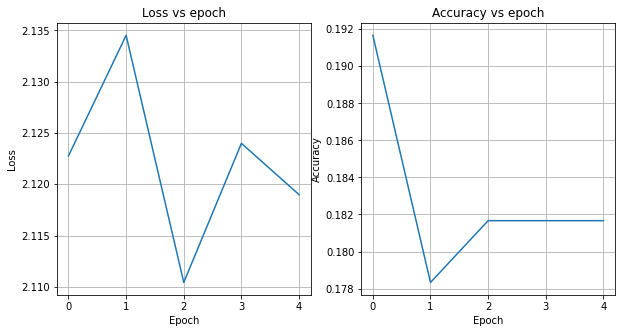

313/313 - 0s - loss: 2.0871 - accuracy: 0.2003
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.03812895 0.04106763 0.12875862 0.20167404 0.03731029 0.04300878
  0.18246111 0.04145955 0.2481827  0.03794829]], shape=(2, 10), dtype=float32)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.81289981e-02 4.10676450e-02 1.28758669e-01 ... 4.14595902e-02
  2.48182669e-01 3.79483253e-02]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 3.14662761e-16
  1.75484351e-19 0.00000000e+00]
 ...
 [1.12564377e-01 7.42018297e-02 1.16353959e-01 ... 8.55862573e-02
  1.25625789e-01 1.20189704e-01]
 [1.12564377e-01 7.42018297e-02 1.16353959e-01 ... 8.55862573e-02
  1.25625789e-01 1.20189704e-01]
 [1.12564377e-01 7.42018297e-02 1.16353959e-01 ... 8.55862573e-02
  1.25625789e-01 1.20189704e-01]]
(10000, 10)
10000


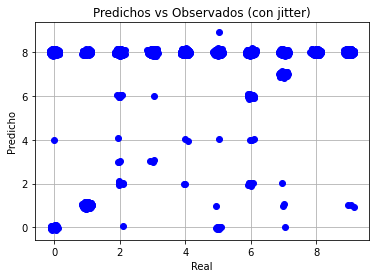

Matriz de confusión:
col_0   0    1  2  3  4   6    7     8  9
row_0                                    
0      89    0  0  0  1   0    0   890  0
1       0  689  0  0  0   0    0   446  0
2       1    0  9  3  1   8    0  1010  0
3       0    0  0  3  0   1    0  1006  0
4       0    0  2  0  2   0    0   978  0
5      11    1  0  0  1   0    0   878  1
6       0    0  8  0  3  46    0   901  0
7       1    2  1  0  0   0  191   833  0
8       0    0  0  0  0   0    0   974  0
9       0    3  0  0  0   0    0  1006  0
Accuracy =  0.1625
******************************************************************************************




Adadelta : 0.9
Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 2.0661 - accuracy: 0.2067
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 2.1183 - accuracy: 0.1850
Epoch 3/5
19/19 [==============================] - 0s 3ms/step - loss: 2.1070 - accuracy: 0.1900
Epoch 4/5
19/19 [==============================] - 0s 4

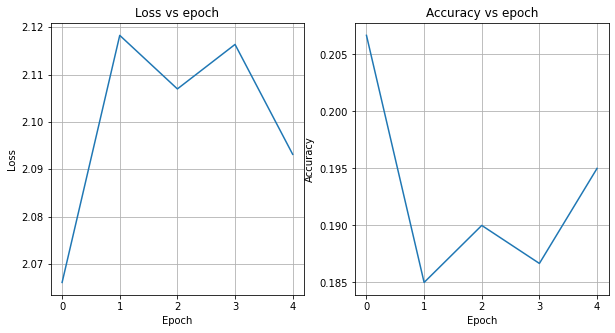

313/313 - 0s - loss: 2.0855 - accuracy: 0.2003
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.03769417 0.04070242 0.12677503 0.20261328 0.03776062 0.04258927
  0.18856569 0.04116621 0.24453266 0.03760062]], shape=(2, 10), dtype=float32)
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.7694219e-02 4.0702436e-02 1.2677501e-01 ... 4.1166242e-02
  2.4453263e-01 3.7600651e-02]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 3.1504469e-16
  1.7437663e-19 0.0000000e+00]
 ...
 [1.1175530e-01 7.3855527e-02 1.1504994e-01 ... 8.5343033e-02
  1.2430602e-01 1.1959633e-01]
 [1.1175530e-01 7.3855527e-02 1.1504994e-01 ... 8.5343033e-02
  1.2430602e-01 1.1959633e-01]
 [1.1175530e-01 7.3855527e-02 1.1504994e-01 ... 8.5343033e-02
  1.2430602e-01 1.1959633e-01]]
(10000, 10)
10000


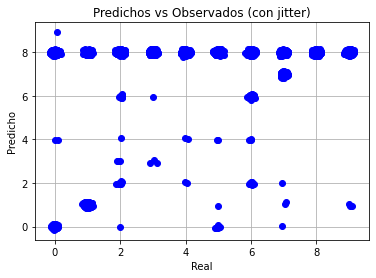

Matriz de confusión:
col_0   0    1  2  3  4   6    7     8  9
row_0                                    
0      89    0  0  0  2   0    0   888  1
1       0  689  0  0  0   0    0   446  0
2       1    0  9  3  1   8    0  1010  0
3       0    0  0  3  0   1    0  1006  0
4       0    0  2  0  2   0    0   978  0
5      11    1  0  0  2   0    0   878  0
6       0    0  8  0  3  46    0   901  0
7       1    2  1  0  0   0  191   833  0
8       0    0  0  0  0   0    0   974  0
9       0    3  0  0  0   0    0  1006  0
Accuracy =  0.1625
******************************************************************************************




SGD : 1.5
Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 2.1176 - accuracy: 0.1683
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 2.1130 - accuracy: 0.1750
Epoch 3/5
19/19 [==============================] - 0s 3ms/step - loss: 2.1076 - accuracy: 0.1667
Epoch 4/5
19/19 [==============================] - 0s 3ms/st

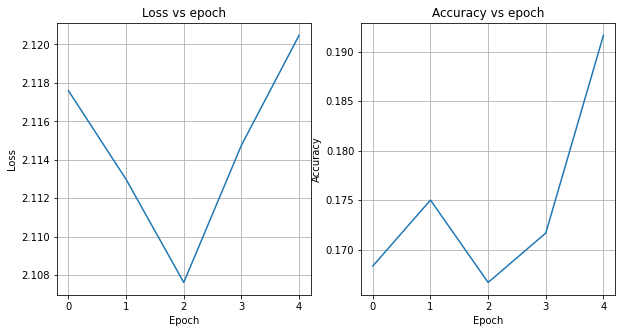

313/313 - 0s - loss: 2.0783 - accuracy: 0.2004
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.03170693 0.03330346 0.11339159 0.1810892  0.03603617 0.03775661
  0.28655136 0.03853363 0.21160369 0.03002742]], shape=(2, 10), dtype=float32)
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.1706959e-02 3.3303466e-02 1.1339155e-01 ... 3.8533658e-02
  2.1160363e-01 3.0027436e-02]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 3.6017135e-16
  1.8432462e-19 0.0000000e+00]
 ...
 [1.0208454e-01 6.5624192e-02 1.1174944e-01 ... 8.6751916e-02
  1.1681274e-01 1.0371765e-01]
 [1.0208454e-01 6.5624192e-02 1.1174944e-01 ... 8.6751916e-02
  1.1681274e-01 1.0371765e-01]
 [1.0208454e-01 6.5624192e-02 1.1174944e-01 ... 8.6751916e-02
  1.1681274e-01 1.0371765e-01]]
(10000, 10)
10000


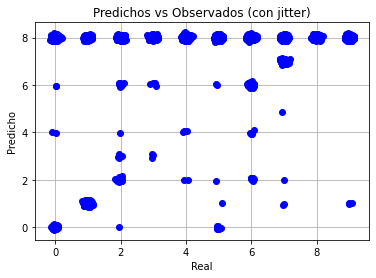

Matriz de confusión:
col_0   0    1   2  3  4  5   6    7     8
row_0                                     
0      87    0   0  0  2  0   2    0   889
1       0  689   0  0  0  0   0    0   446
2       1    0  10  4  1  0  18    0   998
3       0    0   0  3  0  0   4    0  1003
4       0    0   2  0  3  0   0    0   977
5      10    1   1  0  0  0   2    0   878
6       0    0   9  0  4  0  47    0   898
7       0    2   1  0  0  1   0  191   833
8       0    0   0  0  0  0   0    0   974
9       0    3   0  0  0  0   0    0  1006
Accuracy =  0.2004
******************************************************************************************




RSMprop : 1.5
Epoch 1/5
19/19 [==============================] - 0s 4ms/step - loss: 4.9976 - accuracy: 0.1750
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 7.3123 - accuracy: 0.1750
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 5.2263 - accuracy: 0.1933
Epoch 4/5
19/19 [===========================

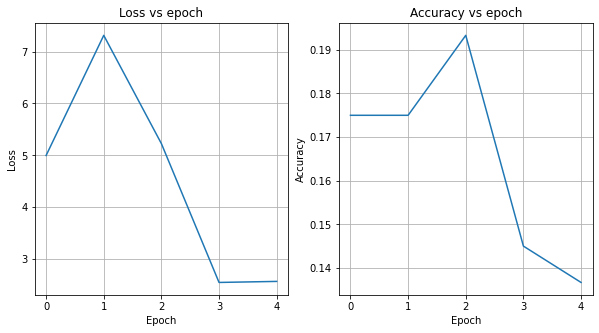

313/313 - 0s - loss: 2.5902 - accuracy: 0.1383
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.06797451 0.1295413  0.06593017 0.21878418 0.06071785 0.14133652
  0.1389444  0.00659045 0.16047785 0.00970287]], shape=(2, 10), dtype=float32)
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [6.7974553e-02 1.2954138e-01 6.5930150e-02 ... 6.5904530e-03
  1.6047779e-01 9.7028716e-03]
 [4.5057085e-21 1.0000000e+00 3.5537273e-24 ... 1.0932616e-21
  9.6358157e-09 3.8438920e-22]
 ...
 [1.5823475e-01 1.8455796e-01 4.6978448e-02 ... 1.0727635e-02
  6.4051926e-02 2.4231743e-02]
 [1.5823475e-01 1.8455796e-01 4.6978448e-02 ... 1.0727635e-02
  6.4051926e-02 2.4231743e-02]
 [1.5823475e-01 1.8455796e-01 4.6978448e-02 ... 1.0727635e-02
  6.4051926e-02 2.4231743e-02]]
(10000, 10)
10000


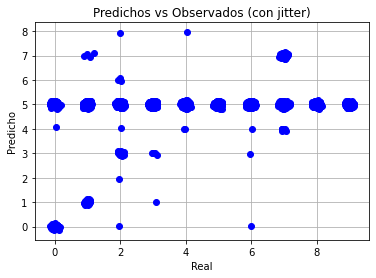

Matriz de confusión:
col_0    0   1  2   3  4     5  6    7  8
row_0                                    
0      231   0  0   0  1   748  0    0  0
1        0  70  0   0  0  1061  0    4  0
2        1   0  1  19  1  1006  3    0  1
3        0   1  0   4  0  1005  0    0  0
4        0   0  0   0  2   979  0    0  1
5        0   0  0   0  0   892  0    0  0
6        1   0  0   1  1   955  0    0  0
7        0   0  0   0  7   838  0  183  0
8        0   0  0   0  0   974  0    0  0
9        0   0  0   0  0  1009  0    0  0
Accuracy =  0.1383
******************************************************************************************




Adagrad : 1.5
Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 2.2460 - accuracy: 0.1450
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss: 2.2482 - accuracy: 0.1433
Epoch 3/5
19/19 [==============================] - 0s 3ms/step - loss: 2.2452 - accuracy: 0.1383
Epoch 4/5
19/19 [==============================] - 0s 3m

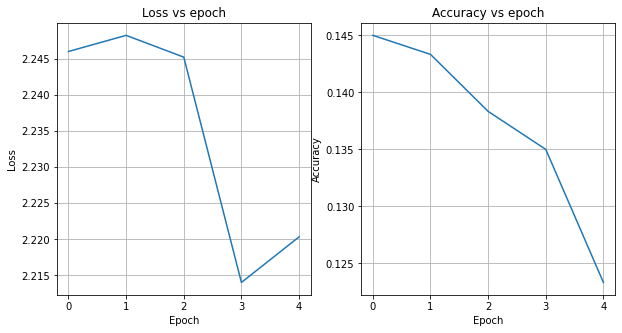

313/313 - 0s - loss: 2.2506 - accuracy: 0.1503
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.0254754  0.05560545 0.08344327 0.25221342 0.03922479 0.03551541
  0.24684855 0.02835959 0.20293555 0.03037866]], shape=(2, 10), dtype=float32)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.54754163e-02 5.56055009e-02 8.34432617e-02 ... 2.83596143e-02
  2.02935517e-01 3.03786863e-02]
 [3.86313622e-21 1.00000000e+00 1.02663928e-23 ... 1.07676443e-20
  2.81749006e-08 2.75261434e-21]
 ...
 [8.26989412e-02 1.10475294e-01 8.29142183e-02 ... 6.43742532e-02
  1.12953186e-01 1.05797768e-01]
 [8.26989412e-02 1.10475294e-01 8.29142183e-02 ... 6.43742532e-02
  1.12953186e-01 1.05797768e-01]
 [8.26989412e-02 1.10475294e-01 8.29142183e-02 ... 6.43742532e-02
  1.12953186e-01 1.05797768e-01]]
(10000, 10)
10000


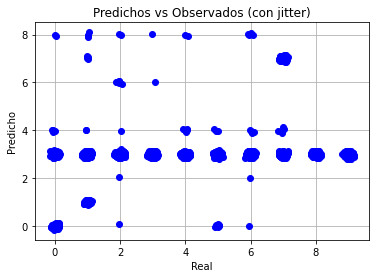

Matriz de confusión:
col_0    0   1  2     3  4  6    7  8
row_0                                
0      232   0  0   742  4  0    0  2
1        0  70  0  1055  2  0    4  4
2        1   0  1  1018  1  9    0  2
3        0   0  0  1008  0  1    0  1
4        0   0  0   975  5  0    0  2
5        7   0  0   882  3  0    0  0
6        1   0  1   947  4  0    0  5
7        0   0  0   836  5  0  187  0
8        0   0  0   974  0  0    0  0
9        0   0  0  1009  0  0    0  0
Accuracy =  0.1316
******************************************************************************************




Adadelta : 1.5
Epoch 1/5
19/19 [==============================] - 0s 4ms/step - loss: 2.2082 - accuracy: 0.1350
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 2.2108 - accuracy: 0.1483
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 2.1978 - accuracy: 0.1533
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 2.1930 - accuracy: 0.1550
Epoch 

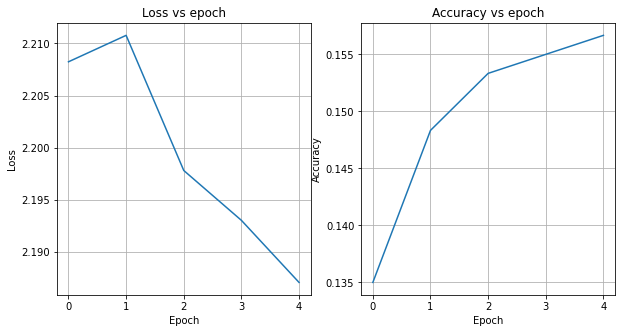

313/313 - 0s - loss: 2.2460 - accuracy: 0.1478
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.02633575 0.05779954 0.09013617 0.23183581 0.03851388 0.03639705
  0.24862178 0.03079237 0.2078359  0.03173176]], shape=(2, 10), dtype=float32)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.63357703e-02 5.77995963e-02 9.01361704e-02 ... 3.07923947e-02
  2.07835898e-01 3.17317881e-02]
 [3.80838316e-21 1.00000000e+00 1.05640363e-23 ... 1.11517356e-20
  2.76592136e-08 2.74158997e-21]
 ...
 [8.40459689e-02 1.12892337e-01 8.80499482e-02 ... 6.87143803e-02
  1.13724284e-01 1.08641140e-01]
 [8.40459689e-02 1.12892337e-01 8.80499482e-02 ... 6.87143803e-02
  1.13724284e-01 1.08641140e-01]
 [8.40459689e-02 1.12892337e-01 8.80499482e-02 ... 6.87143803e-02
  1.13724284e-01 1.08641140e-01]]
(10000, 10)
10000


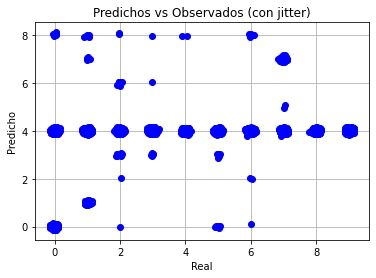

Matriz de confusión:
col_0    0   1  2   3     4  5   6    7  8
row_0                                     
0      232   0  0   0   742  0   0    0  6
1        0  71  0   0  1054  0   0    4  6
2        1   0  1  18   997  0  13    0  2
3        0   0  0   6  1002  0   1    0  1
4        0   0  0   0   980  0   0    0  2
5        8   0  0   7   877  0   0    0  0
6        1   0  2   0   948  0   0    0  7
7        0   0  0   0   838  2   0  188  0
8        0   0  0   0   974  0   0    0  0
9        0   0  0   0  1009  0   0    0  0
Accuracy =  0.1478
******************************************************************************************






In [ ]:
n = [0.001,0.1,0.5,0.9,1.5]
for i in n:
  modelRedOptimizadorSGDTasaAprendizaje(i)
  modelRedOptimizadorRSMpropTasaAprendizaje(i)
  modelRedOptimizadorAdagramTasaAprendizaje(i)
  modelRedOptimizadorAdadeltaTasaAprendizaje(i)

##Análisis de los resultados

El resumen de los resultados es el siguiente:

###n 0.001
* SGD 0.9933
* RSMprop 0.9950
* Adagrad 1
* Adadelta 1

###n 0.1
* SGD 1
* RSMprop 0.65
* Adagrad 0.7417
* Adadelta 0.7617

###n 0.5
* SGD 0.7317
* RSMprop 0.3633
* Adagrad 0.2333
* Adadelta 0.2500

###n 0.9
* SGD 0.2367
* RSMprop 0.2150
* Adagrad 0.1817
* Adadelta 0.2067

###n 1.5
* SGD 0.1917
* RSMprop 0.1933
* Adagrad 0.1450
* Adadelta 0.1567


Se observa que a medida que aumenta la tasa de aprendizaje en cada modelo, disminuye su accuracy.

### ¿Cuál fue el método de optimización menos afectado por la reducción del conjunto de datos?

El método SGD.

### ¿Cuál fue la tasa de aprendizaje menos afectada por la reducción del conjunto de datos?

n 0.001

### ¿Cuál fue el método que más rápido convergió?

El método SGD. Convergió rápidamente, aunque cayendo en el sobreajuste, con una tasa de aprendizaje del 0.1 llegó en la época 3 al 100% del accuracy.

## Conclusiones

* Para el caso del conjunto de datos reducido, una tasa de aprendizaje pequeña da como resultado que se caiga en el sobreajuste del modelo. Esto significa que el modelo aprendió de los datos de entrenamiento muy bien, y el desempeño varía ampliamente con nuevas y desconocidas muestras. Esto se explica porque los pasos que da el modelo para actualizar los valores hace que sean casi siempre los mismos, por lo que el modelo queda estable en los datos que conoce.
* Entrenar el modelo con pocos datos, hace que el modelo aprenda de memoria los datos con los que entrenó y no pueda generalizar.
* Se observó la estabilidad de los modelos al tener un conjunto de datos grande y al variar su tasa de aprendizaje en diferentes valores.
* Cuando el modelo es entrenado con una cantidad de datos generosa, independientemente de las diferentes metodologías de optimización, el modelo tiende a dar buenos resultados.
* Para mejorar el desempeño se propone aumentar la cantidad de épocas en la valicación de los modelos.
* Se comprendió que las tasas de aprendizaje muy pequeñas (0.001) tienen a utilizar mayores recursos y tiempo de computación, al tener pasos muy pequeños para actualizar los valores. Mientras que tasas de aprendizaje mayores da pasos muy grandes, es muy probable no llegar a encontrar un valor optimo en su búsqueda.

### Bibliografía